<a href="https://colab.research.google.com/github/ashie2003/nm-project/blob/main/data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Cardiovascular Risk Prediction

##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **done by ASHWIN R ANNA UNIVERSITY (ACT CAMPUS)**


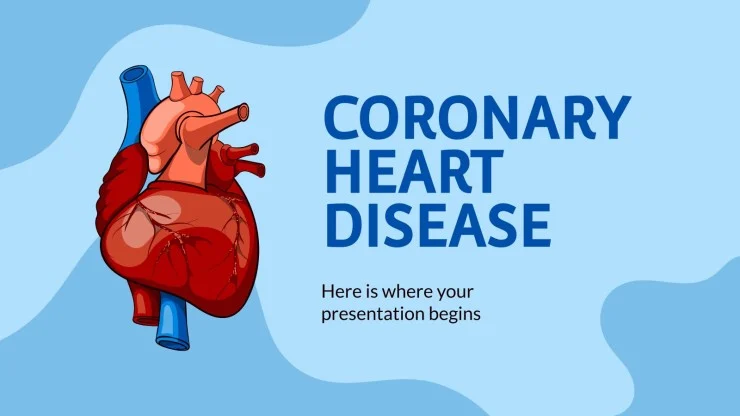

# **Project Summary -**

- The Machine Learning Cardiovascular Risk Prediction project aims to develop a predictive model for assessing an individual's risk of developing cardiovascular disease (CVD). The project will utilize machine learning techniques to analyze data from various sources, including electronic health records, and patient lifestyle data. The model will use these data points to predict an individual's likelihood of developing CVD and identify specific risk.

- The project will involve several stages, including data collection and cleaning, feature engineering, model development. The model will be trained on a dataset of patient.

- The success of the project will depend on the accuracy of the predictive model and its ability to identify individuals who are at risk for CVD.

- Objective: Develop a predictive model to assess an individual's risk of developing cardiovascular disease (CVD).
- Techniques: Utilize machine learning to analyze data from health records, and patient lifestyle data .
- Stages:
1. Data collection and cleaning
2. Feature engineering
3. Model development
4. Model evaluation
5. Future Goal: Create a joblib/Pickle tool for healthcare providers to identify patients at high risk for CVD and intervene early


# **GitHub Link -**

Provide your GitHub Link here.


# **Problem Statement**


*   The dataset we have here is from the Ongoing Cardiovascular study on the residents of the town of Framingham, Massachusetts.
*   The Classfication goal is to predict whether the Patient has a 10-yrs. risk of Future Coronary Heart Disease (CHD).
*   On the basis of the dataset we have to build such model that can predict whether Patient will be diseased or not.?



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [192]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import pickle

### Dataset Loading

In [193]:
# Load Dataset
# https://drive.google.com/file/d/1oSP_h_eVcZOv3A8WqUcDUmmQQy1-tsmb/view?usp=sharing
# df = pd.read_csv("data_cardiovascular_risk.csv")
df = pd.read_csv("/content/data_cardiovascular_risk (1).csv")

### Dataset First View

In [194]:
# Dataset First Look
df.head()

### Look for Education attribute that what it means in CHD (Coronary heart disease).

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [195]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

In [196]:
# Columns/Attributes names
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Dataset Information

In [197]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [198]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [199]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

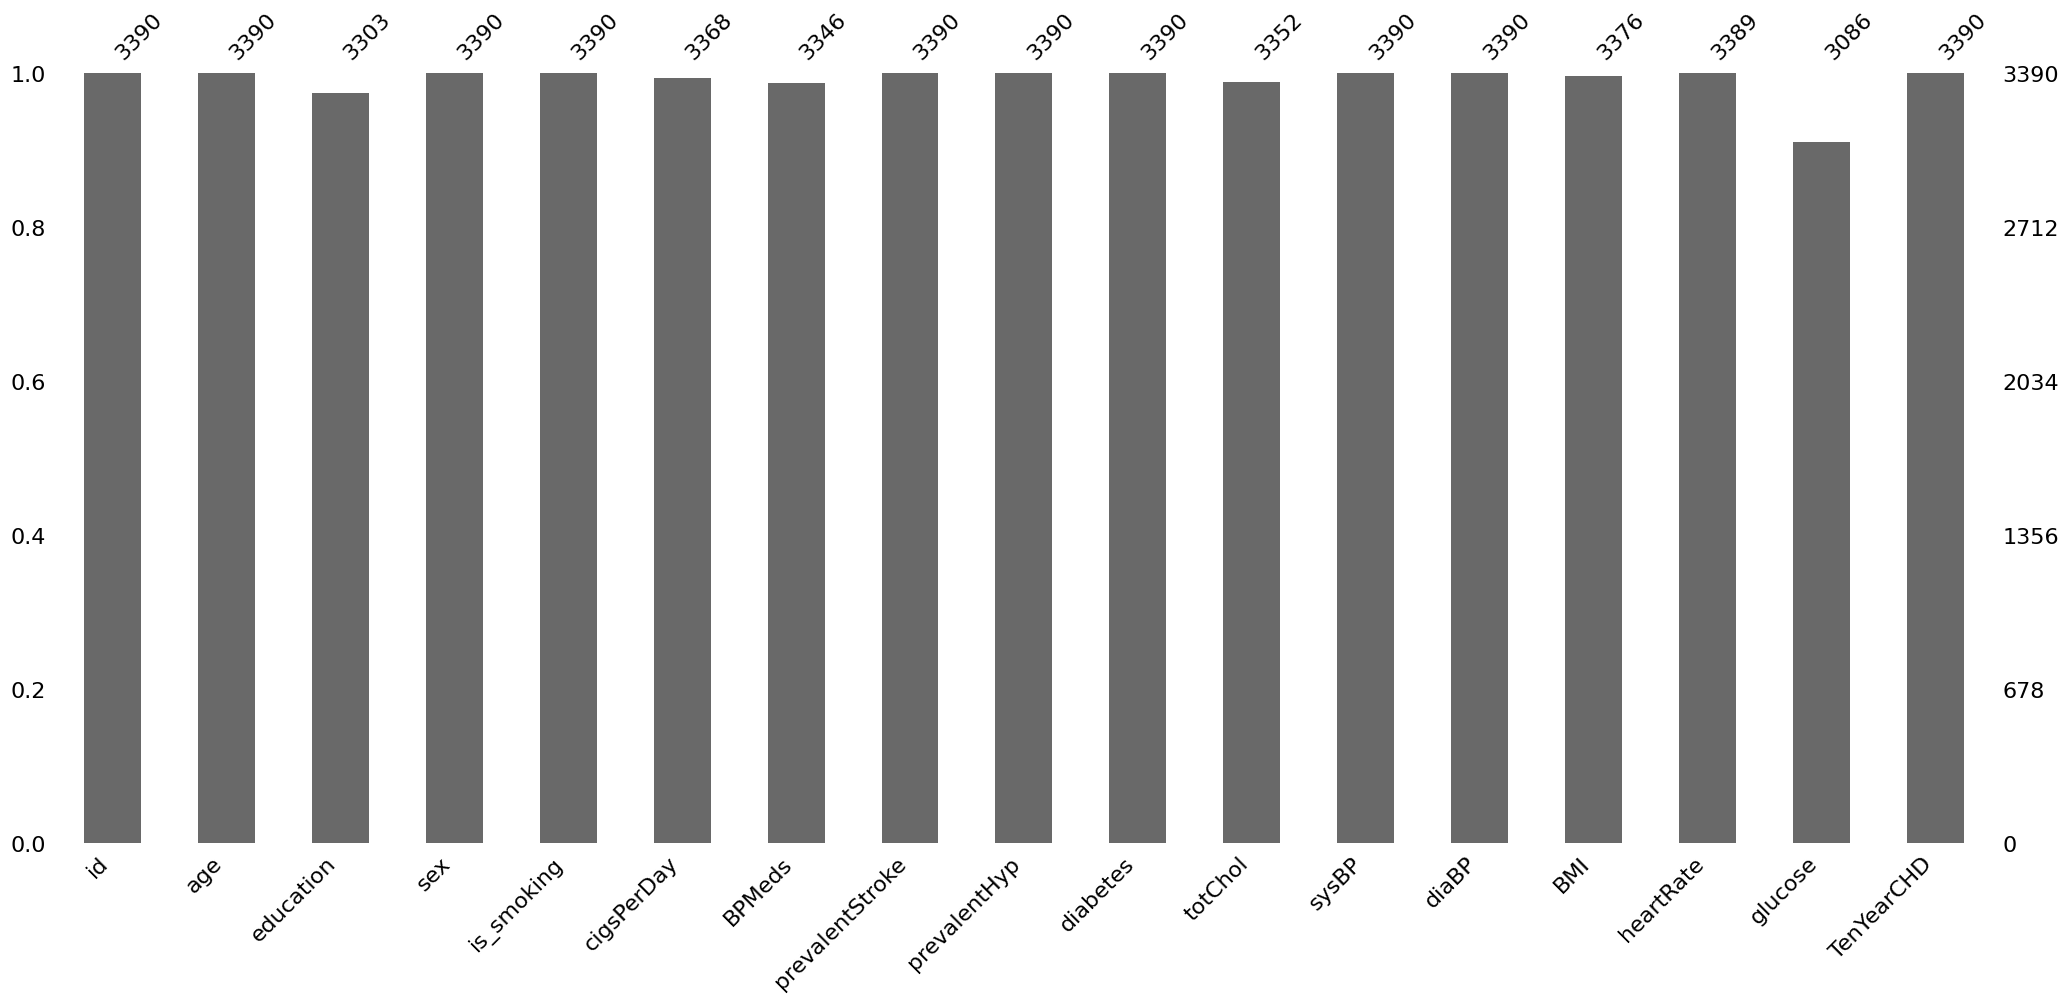

In [200]:
# Visualizing the missing values
msno.bar(df)

We have created this null values visualisation graph using the MISSINGNO Libarary
1.   On the left side we got numbers from 0.0 to 1.0, where 0.0 means 0% and 1.0 means  100%.  Total number of rows we have are 3,390.


<Axes: >

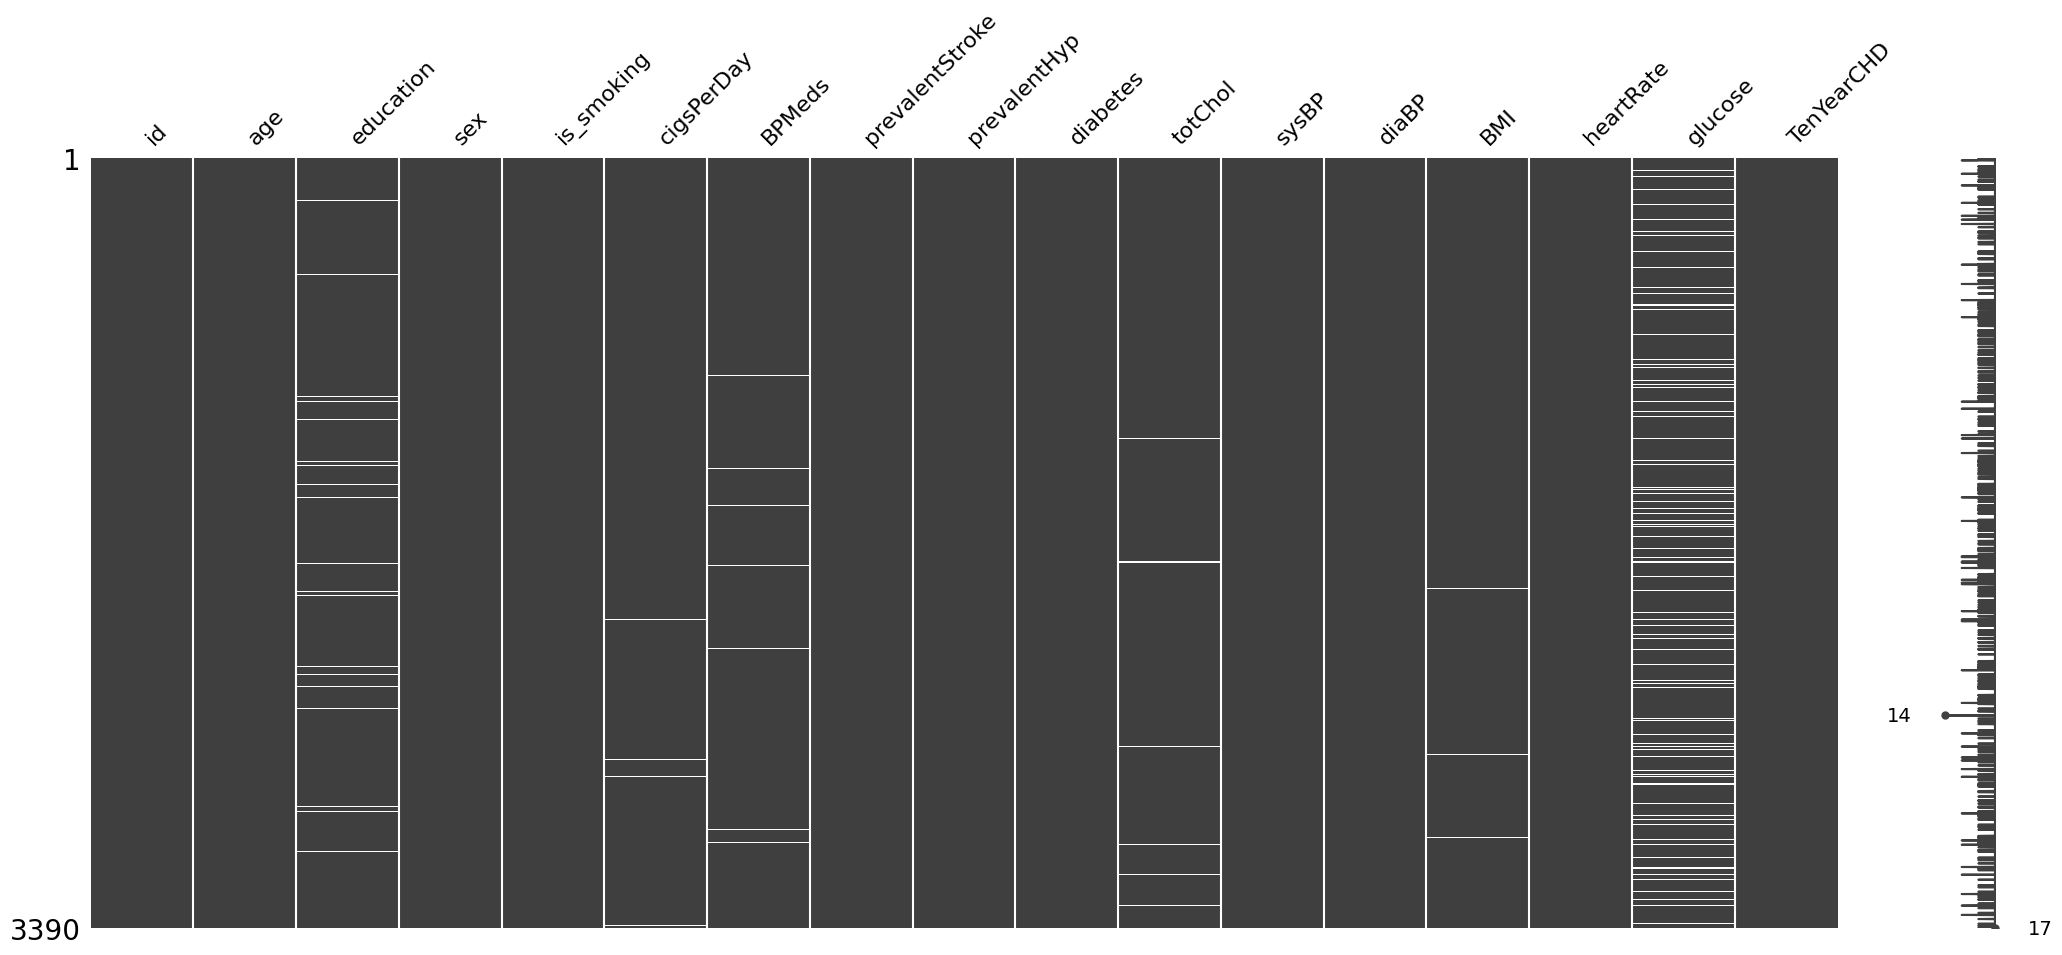

In [201]:
# NULL/MISSING values visualisation using "MATRIX-plot" of MISSINGNO library.
msno.matrix(df)

1.   In the above MATRIX-PLOT of MISSINGNO library we can see that where are missing values placed at.

1.   In Education, cigs_per_day , bp_meds, totchol, BMI and glucose column  have most of the missing/null values.

### What did you know about your dataset?

*   There are 3390 rows/entries and 17 columns/attributes.
*   There are 9-float values, 6-int values and 2-object values (Sex and is_smoking).
- There are zero duplicate values in our dataset.  
* In our dataset there are many null values but max. null values are in Glucose attribute(304) .
- We can understand all the null values in our dataset by looking at the above graphs which explains that how many null values are there and what places they are placed at.





## ***2. Understanding Your Variables***

In [233]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [234]:
# Dataset Describe
df.describe()


,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

- **ID -** Ids are just randon number given to the randon people who participated in this survey.
- **Age -** Age column represents the age of the particpants.
- **SEX -** This columns defines the gender of the participants.
- **IS_SMOKING -** This attribute refers weather a person smokes or not.
- **CIGSPERDAY -** Cigs per day explains that how many cigarettes are being consumed by an individual.
- **BPMeds -** BPMeds explains weather a person taking Bood-Pressure Medicines or not.
- **prevalentStroke -** Prevalent Stroke means if the patient has the history of stroke.
- **prevalentHyp -** If the patient has a history of hypertension.
- **DIABETES -** Patient has Diabetes or not.
- **totChol -** Cholesterol Mesurement.
- **sysBP-** High BP measurement.
- **diaBP-** Low BP measurement.
- **BMI-** Body mass index.
- **heartRate-** heart rate measurement.
- **glucose-** Glucose density present in blood.
- **TenYearCHD-** Heart related disease in upcoming 10 years.

### Check Unique Values for each variable.

In [235]:
# Check Unique Values for each variable.
# HERE WE HAVE FIND THE TOTAL COUNT AND IT'S VALUES.
for i in df:
  print(f"Total Count of Unique values of {i} column - {df[i].nunique()}\n")
  print(f"Total Unique Values of {i} column - {df[i].unique()}\n")
  print("===================================================================================================\n")

Total Count of Unique values of id column - 3390

Total Unique Values of id column - [   0    1    2 ... 3387 3388 3389]


Total Count of Unique values of age column - 39

Total Unique Values of age column - [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


Total Count of Unique values of education column - 4

Total Unique Values of education column - [ 2.  4.  1.  3. nan]


Total Count of Unique values of sex column - 2

Total Unique Values of sex column - ['F' 'M']


Total Count of Unique values of is_smoking column - 2

Total Unique Values of is_smoking column - ['YES' 'NO']


Total Count of Unique values of cigsPerDay column - 32

Total Unique Values of cigsPerDay column - [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


Total Count of Unique values of BPMeds column - 2

Total Unique Values of BPMeds column - [ 0. nan  1.]



## ***3.Data Wrangling***

### Data Wrangling Code

 **(cigsPerDay) Total cigrattes per day exploration with age groups .**
- Chemicals in cigarette smoke cause the blood to thicken and form clots inside veins and arteries.
- Blockage from a clot can lead to a heart attack and sudden death.
- MIN. and MAX. age of patient's are 32yrs & 70yrs.
- We have divided age columns in 4-age groups as age1, age2, age3 & age4.
- All age groups have their range mentioned below.


In [205]:
# Divided age column into 4 groups.
age1 = df[df['age'] <= 40]
age2 = df[(df['age'] > 40) & (df['age'] <= 50)]
age3 = df[(df['age'] > 50) & (df['age'] <= 60)]
age4 = df[(df['age'] > 60) & (df['age'] <= 70)]

In [206]:
# Total cigrattes consumed at the age group of (age1) 32-40yrs. old
print(f"total Cigrattes {age1['cigsPerDay'].sum()}")
print()
print(age1.groupby(["age", "sex"])["cigsPerDay"].sum().reset_index(name ='Total Cigrattes per day'))

total Cigrattes 6813.0

    age sex  Total Cigrattes per day
0    32   F                     15.0
1    33   F                     20.0
2    33   M                      0.0
3    34   F                     80.0
4    34   M                     60.0
5    35   F                     89.0
6    35   M                    223.0
7    36   F                    228.0
8    36   M                    505.0
9    37   F                    460.0
10   37   M                    491.0
11   38   F                    473.0
12   38   M                    765.0
13   39   F                    556.0
14   39   M                   1021.0
15   40   F                    666.0
16   40   M                   1161.0


In [207]:
# Total cigrattes consumed at the age group of (age2) 40-50 yrs. old
print(f"total Cigrattes {age2['cigsPerDay'].sum()}")
print()
print(age2.groupby(["age", "sex"])["cigsPerDay"].sum().reset_index(name ='Total Cigrattes per day'))


total Cigrattes 13833.0

    age sex  Total Cigrattes per day
0    41   F                    507.0
1    41   M                   1064.0
2    42   F                    586.0
3    42   M                   1055.0
4    43   F                    559.0
5    43   M                    968.0
6    44   F                    490.0
7    44   M                   1156.0
8    45   F                    432.0
9    45   M                    794.0
10   46   F                    781.0
11   46   M                    710.0
12   47   F                    667.0
13   47   M                    730.0
14   48   F                    407.0
15   48   M                    890.0
16   49   F                    265.0
17   49   M                    653.0
18   50   F                    460.0
19   50   M                    659.0


In [208]:
# Total ciigrattes consumed at the age group of (age3) 50-60 yrs. old
print(f"total Cigrattes {age3['cigsPerDay'].sum()}")
print()
print(age3.groupby(["age", "sex"])["cigsPerDay"].sum().reset_index(name ='Total Cigrattes per day'))


total Cigrattes 7626.0

    age sex  Total Cigrattes per day
0    51   F                    361.0
1    51   M                    752.0
2    52   F                    276.0
3    52   M                    541.0
4    53   F                    283.0
5    53   M                    667.0
6    54   F                    193.0
7    54   M                    642.0
8    55   F                    167.0
9    55   M                    477.0
10   56   F                    252.0
11   56   M                    455.0
12   57   F                    224.0
13   57   M                    402.0
14   58   F                    251.0
15   58   M                    459.0
16   59   F                    188.0
17   59   M                    514.0
18   60   F                    180.0
19   60   M                    342.0


In [209]:
# Total ciigrattes consumed at the age group of (age4) 60-70 yrs. old
print(f"total Cigrattes {age4['cigsPerDay'].sum()}")
print()
print(age4.groupby(["age", "sex"])["cigsPerDay"].sum().reset_index(name ='Total Cigrattes per day'))


total Cigrattes 2274.0

    age sex  Total Cigrattes per day
0    61   F                    171.0
1    61   M                    296.0
2    62   F                     61.0
3    62   M                    367.0
4    63   F                    144.0
5    63   M                    413.0
6    64   F                    155.0
7    64   M                    246.0
8    65   F                     13.0
9    65   M                     54.0
10   66   F                     20.0
11   66   M                     91.0
12   67   F                     47.0
13   67   M                    111.0
14   68   F                     40.0
15   68   M                     40.0
16   69   F                      0.0
17   69   M                      5.0
18   70   F                      0.0


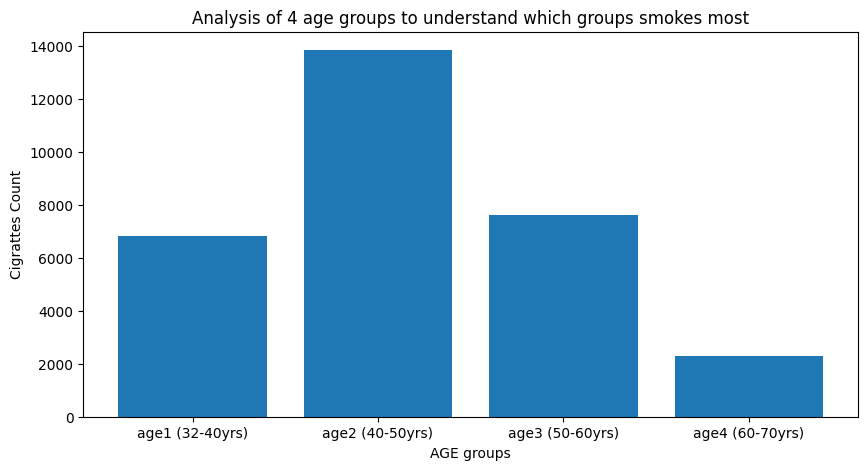

In [210]:
# Importing Library
import matplotlib.pyplot as plt
import numpy as np

# creating the dataset
x = np.array(["age1 (32-40yrs)", "age2 (40-50yrs)", "age3 (50-60yrs)", "age4 (60-70yrs)"])
y = np.array([age1['cigsPerDay'].sum(), age2['cigsPerDay'].sum(), age3['cigsPerDay'].sum(), age4['cigsPerDay'].sum()])

# Bar-plot plotting
fig = plt.figure(figsize = (10, 5))
plt.xlabel("AGE groups")
plt.ylabel("Cigrattes Count")
plt.title("Analysis of 4 age groups to understand which groups smokes most")

plt.bar(x,y)
plt.show()

**CONCLUSION:-**
- The insight we got from the above bar graph, that the second age group age2 (range 40-50 yrs) old patients having the highest Ciggrattes consumption followed by age3, age1 and age4.
- people smoke more when they are young or at their mid age.
- People smoke less as they starts grow old.
- we found that young people starts consuming ciggrattes and reach their peak by the age of 40-50 yrs old and later on this consumption range starts decreasing due to oldage.


**CHD (Coronary_Heart_disease) ATTRIBUTES AND THEIR BEST RANGE FOR A HEALTHY BODY:--**
- Best range for Cholestrol (totChol) for healthy body = Less than 200
- Best range for Systolic-BP (sysBP) for healthy body = 120 to 145
- Best range for Diastolic-BP (diaBP) for healthy body = 80 to 95
- Best range for Body-Mass-Index (BMI) for healthy body = 18.5 to 25 BMI
- Best range for HeartRate (heartrate) for healthy body = 60 to 100
- Best range for Glucose (glucose) for healthy body = 70 to 100

In [211]:
# Here we have applied conditions for every single attribute that has an effect for CHD. But here we have filtered only Healty range of every attribute.

Healthy_CHD = df.loc[(df['totChol']<=200) &
              (df['sysBP']>=120) & (df['sysBP']<= 145) &
              (df['diaBP']>=80) & (df['diaBP']<= 95) &
              (df['BMI']>=18.5) & (df['BMI']<= 25)&
              (df['heartRate']>=60) & (df['heartRate']<= 100)&
              (df['glucose']>=70) & (df['glucose']<= 100)]
Healthy_CHD.reset_index()

,index,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,21,21,38,2.0,F,NO,0.0,0.0,0,0,0,175.0,142.0,86.0,22.01,82.0,73.0,0
1,32,32,51,3.0,F,NO,0.0,0.0,0,1,0,198.0,142.5,80.0,23.86,76.0,100.0,0
2,65,65,37,4.0,F,YES,10.0,0.0,0,0,0,156.0,120.0,87.0,21.80,66.0,89.0,0
3,133,133,61,NaN,M,YES,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
4,156,156,39,2.0,F,YES,20.0,0.0,0,0,0,190.0,137.0,81.0,19.57,80.0,85.0,1
5,265,265,41,1.0,F,NO,0.0,NaN,0,0,0,179.0,121.0,83.0,23.04,66.0,90.0,0
6,328,328,41,1.0,F,NO,0.0,0.0,0,0,0,193.0,127.0,83.0,21.49,60.0,80.0,0
7,344,344,62,1.0,M,YES,20.0,0.0,0,0,0,168.0,129.5,87.0,20.56,65.0,80.0,0
8,395,395,37,4.0,F,YES,20.0,0.0,0,0,0,186.0,135.0,91.0,21.48,66.0,84.0,0
9,435,435,39,2.0,M,YES,30.0,0.0,0,0,0,199.0,124.0,86.0,23.39,76.0,72.0,0


In [212]:
# Total number of records that have the best Healthy body ranges in all attributes.
Healthy_CHD.shape

(43, 17)

### What all manipulations have you done and insights you found?

- First of all we have compared CigsPerDay columns with age in 4-different groups of age , and insight we found is mention above only.
- We have gathered all the attributes that lead to CHD disease ,but we put conditions in such manner that we have got people who are completely in the range of Healthy body in all aspects.
- The count of people who are safe under the healthy range are 39 and still 4 people somehow got some CHD.  
- We have mentioned all the insights in every single manipulation we have done above.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

-  **- CATEGORICAL ATTRIBUTES :**  sex || is_smoking || BPMeds || PrevalentStroke || Prevalenthyp || Diabetes || TenyearCHD
-  **- NUMERICAL ATTRIBUTES :** age || cigsPerDay || totChol || sysBP || diaBP || BMI || heartrate || Glucose


#### Chart - 1

sex
F    1923
M    1467
Name: count, dtype: int64

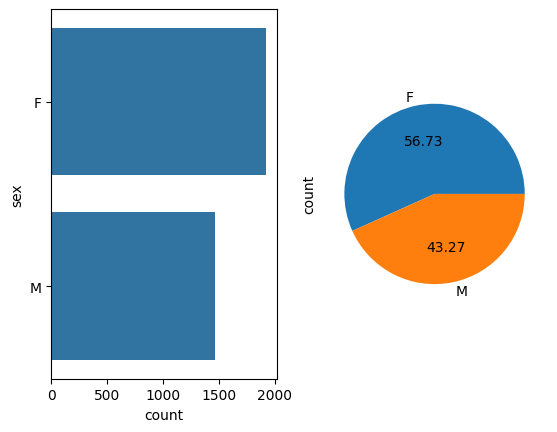

In [213]:
# Chart - 1
plt.subplot(1,2,1)
sns.countplot(df['sex'])

plt.subplot(1,2,2)
df['sex'].value_counts().plot(kind = 'pie',autopct='%.2f')

df['sex'].value_counts()

##### 1. Why did you pick the specific chart?

We pick two charts (Bar and Pie chart) to understand both in numbers & percentage.

##### 2. What is/are the insight(s) found from the chart?

- There are 1467 male and 1923 female in the dataset.
- There are more females in comparison to the males.
- The percentage of male and female are 43.27 & 56.73.

#### Chart - 2

is_smoking
NO     1703
YES    1687
Name: count, dtype: int64

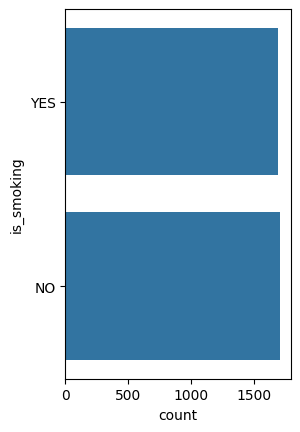

In [214]:
# Chart - 2 visualization code
plt.subplot(1,2,1)
sns.countplot(df['is_smoking'])

df['is_smoking'].value_counts()

##### 1. Why did you pick the specific chart?

Sex attribute had only 2 values so it's best to visualize using subplot.

##### 2. What is/are the insight(s) found from the chart?

- There are 1,687 people who smokes ciggratte and there are 1703 who don't smoke.
- People who smoke and don't are almost same.
- It will help us to predict the future of those people who will suffer from CHD in next 10-yrs or not.

#### Chart - 3

BPMeds
0.0    3246
1.0     100
Name: count, dtype: int64

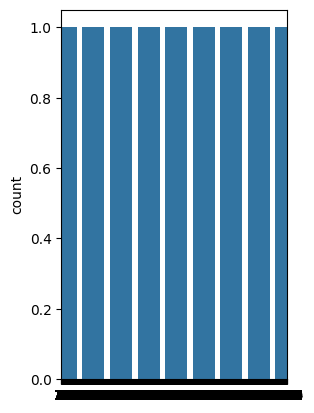

In [215]:
# Chart - 3 visualization code
plt.subplot(1,2,1)
sns.countplot(df['BPMeds'])

df['BPMeds'].value_counts()

##### 1. Why did you pick the specific chart?

BPMeds attribute have only 2 (0 & 1) values so it's best to visualize using subplot.

##### 2. What is/are the insight(s) found from the chart?

where,  
- 0 -> People not taking BP medicine.
- 1 -> Peope taking BP medicine.
- In our dataset we found that (3,246)max. number of people are free from BP medicine, while 100 people are taking it.

#### Chart - 4

prevalentStroke
0    3368
1      22
Name: count, dtype: int64

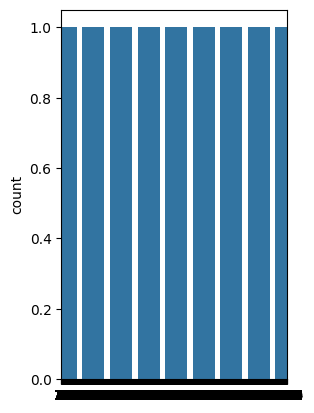

In [216]:
# Chart - 4 visualization code
plt.subplot(1,2,1)
sns.countplot(df['prevalentStroke'])

df['prevalentStroke'].value_counts()

##### 1. Why did you pick the specific chart?

prevalentStroke attribute have only 2-values(0 & 1) so it's best to visualize using subplot.

##### 2. What is/are the insight(s) found from the chart?

where,  
- 0 -> Peope do not have a history of stroke.
- 1 -> Peope have a history of stroke.
- In our dataset we found that (3,368)max. number of people do not have any history of stroke, while 22 people have an history of stroke.

#### Chart - 5

prevalentHyp
0    2321
1    1069
Name: count, dtype: int64

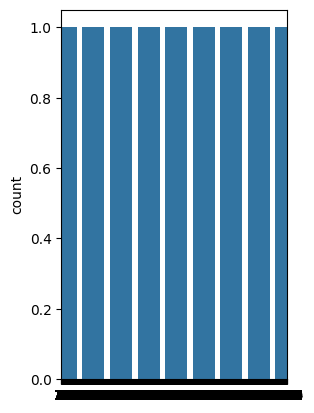

In [217]:
# Chart - 5 visualization code
plt.subplot(1,2,1)
sns.countplot(df['prevalentHyp'])

df['prevalentHyp'].value_counts()

##### 1. Why did you pick the specific chart?

Sex prevalentHyp have only 2 values so it's best to visualise using subplot.

##### 2. What is/are the insight(s) found from the chart?

where,  
- 0 -> People do not have an history of Hypertension.
- 1 -> Peope have a history of hypertenstion.
- In our dataset we found that (2,321)max. number of people are free from Hypertension while 1069 people have an history of hypertension.

#### Chart - 6

diabetes
0    3303
1      87
Name: count, dtype: int64

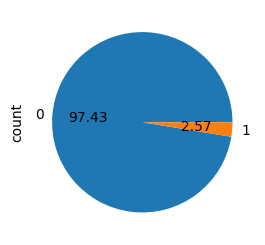

In [218]:
# Chart - 6 visualization code
plt.subplot(1,2,1)
df['diabetes'].value_counts().plot(kind = 'pie',autopct='%.2f')

df['diabetes'].value_counts()

##### 1. Why did you pick the specific chart?

- We pick pie-chart to show the number of percentage of people who have Diabetes.


##### 2. What is/are the insight(s) found from the chart?

- There are 97.43% of people who have don't Diabetes and rest 2.57% of people have it.

#### Chart - 7

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

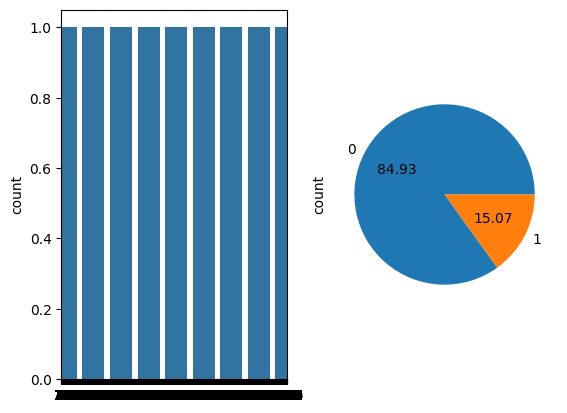

In [219]:
# Chart - 7 visualization code
plt.subplot(1,2,1)
sns.countplot(df['TenYearCHD'])

plt.subplot(1,2,2)
df['TenYearCHD'].value_counts().plot(kind = 'pie',autopct='%.2f')

df['TenYearCHD'].value_counts()

##### 1. Why did you pick the specific chart?

TenYearCHD attribute have only 2 values (0 & 1) so it's best to visualize using subplot.

##### 2. What is/are the insight(s) found from the chart?

- From the Pie chart we can see that almost 85% of people don't have any CHD (Coronary Heart Disease), and rest 15% of people are facing CHD disease.
- From the Sub-plot we can see total count as well.
- NOTE:- From the Above visualisation analysis we find that our categorical column is not balanced.

#### Chart - 8

<Axes: ylabel='count'>

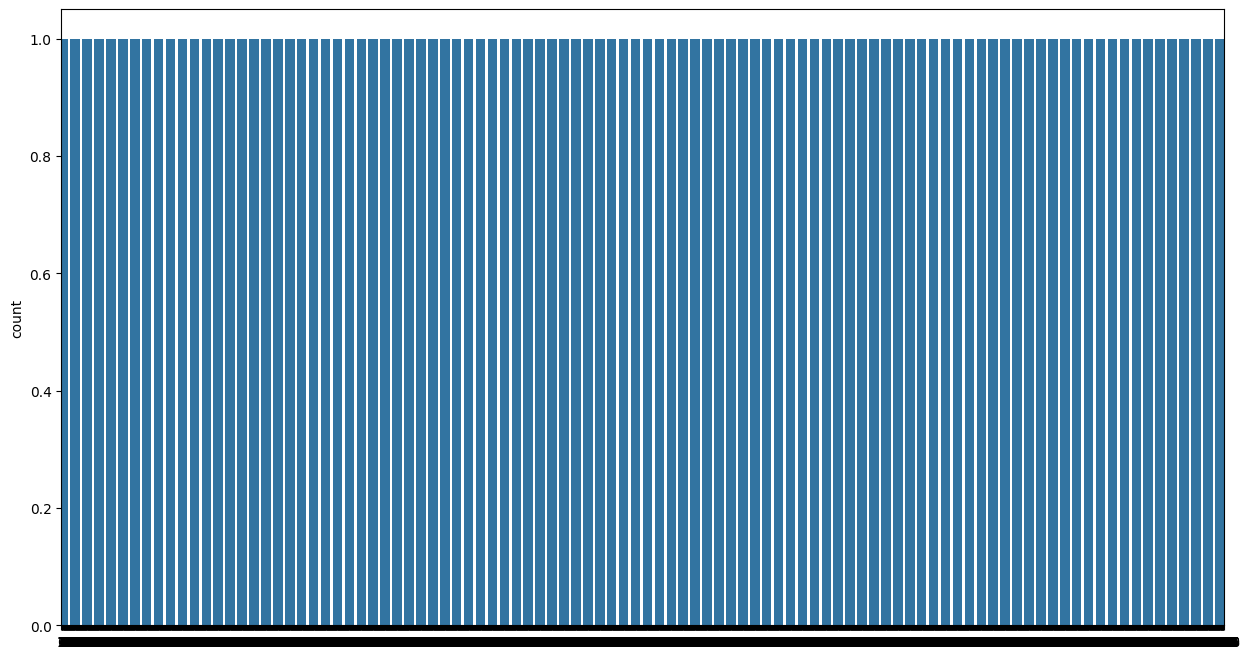

In [232]:
# Chart - 8 visualization code
plt.figure(figsize=(15,8))
sns.countplot(df['age'])

##### 1. Why did you pick the specific chart?

Picking this chart defines the count of unique number of ages perfectly.

##### 2. What is/are the insight(s) found from the chart?

- Maximum number of people lies in between the Age of 39, 40, 41, 42 & 46.
- If we look at the graph in whole. We can see it's almost like Normal Distribution but right-Skewed.

#### Chart - 9

**Que.->  How does Ciggrattes leads to heart related diseases?**
- Ans-> Smoking increases the formation of plaque in blood vessels. Coronary Heart Disease occurs when arteries that carry blood to the heart muscle are narrowed by plaque or blocked by clots. Chemicals in cigarette smoke cause the blood to thicken and form clots inside veins and arteries.

<Axes: ylabel='count'>

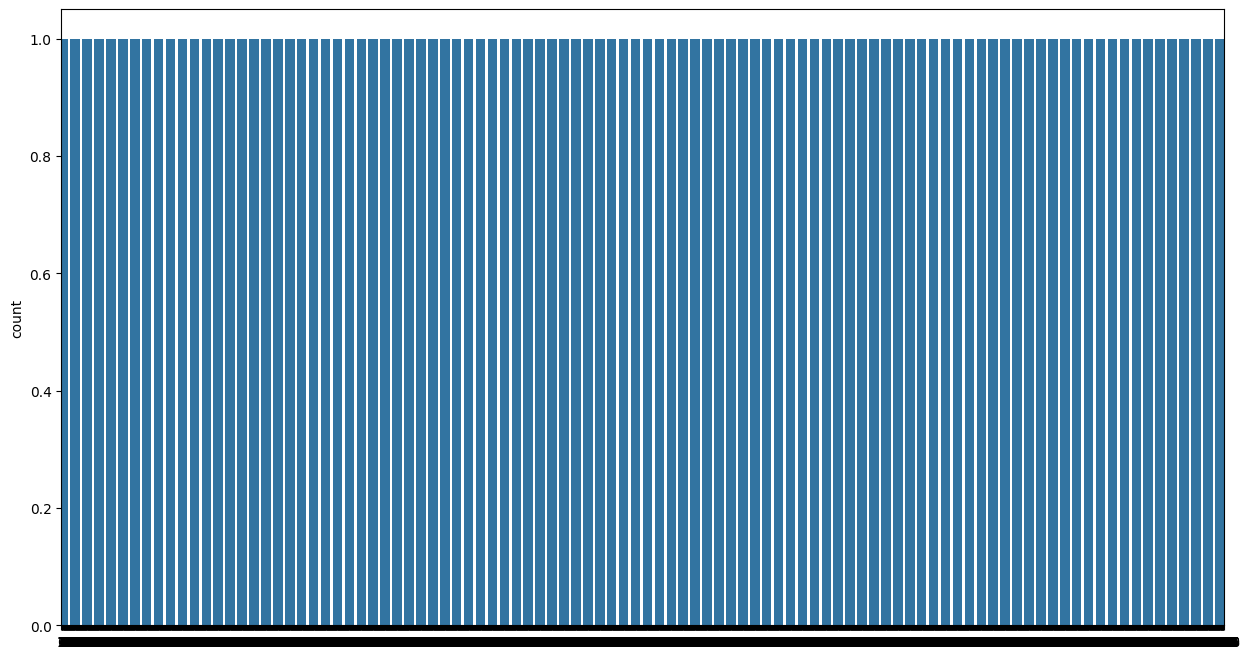

In [236]:
# Chart - 9 visualization code
plt.figure(figsize=(15,8))
sns.countplot(df['cigsPerDay'])

##### 1. Why did you pick the specific chart?

We pick chart to show that how many Ciggrattes are being consumed on daily basis.

##### 2. What is/are the insight(s) found from the chart?

- We found that there are 606 people who comsume maximum 20 ciggrattes per day.
- We found that there are 48 people who comsume minimum 1 ciggrattes per day.
- And as of 0 means, there are more than 600 people who don't smoke.

#### Chart - 10

<ipython-input-222-ad7734025bf7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['totChol'])


<Axes: xlabel='totChol', ylabel='Density'>

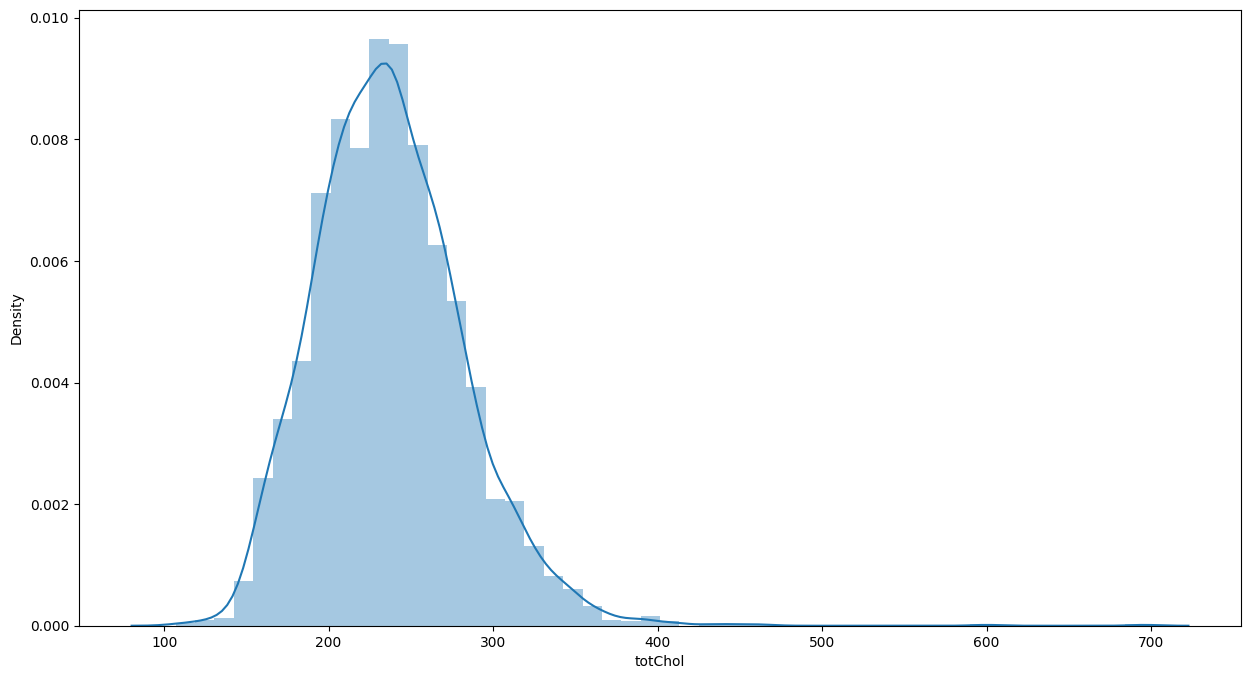

In [222]:
# Chart - 10 visualization code .
plt.figure(figsize=(15,8))
sns.distplot(df['totChol'])

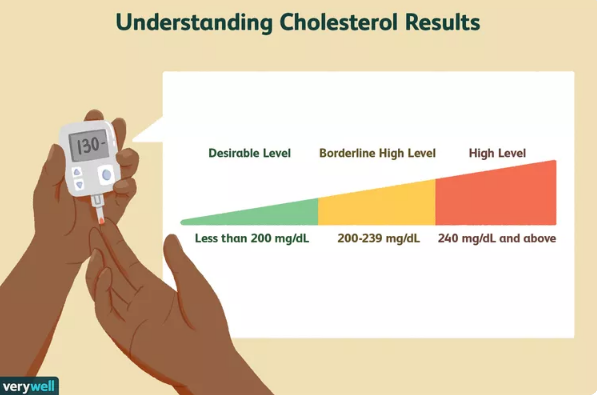

##### 1. Why did you pick the specific chart?

- We pick this dist plot to understand the distribution of the totChol column.

##### 2. What is/are the insight(s) found from the chart?

- We find that our totChol column is almost normally Distributed.
- So we can applied Z-score method to find the outliers.

#### Chart - 11

<ipython-input-223-18c54e23a6ca>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sysBP'])


<Axes: xlabel='sysBP', ylabel='Density'>

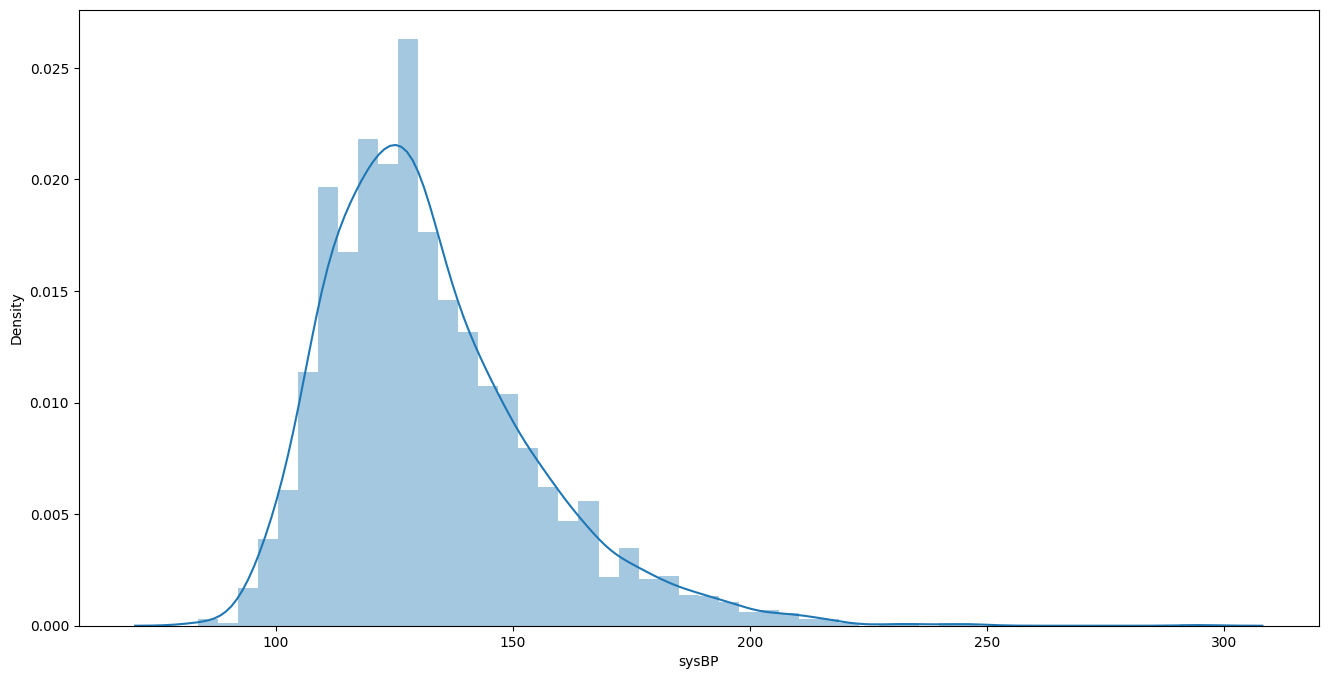

In [223]:
# Chart - 11 visualization code
plt.figure(figsize=(16,8))
sns.distplot(df['sysBP'])

##### 1. Why did you pick the specific chart?

- We pick this dist plot to understand the distribution of the totChol column.

##### 2. What is/are the insight(s) found from the chart?

- We find that our sysBP column is almost like Normal Distribution but it is slightly right skewed.

#### Chart - 12

<Axes: ylabel='diaBP'>

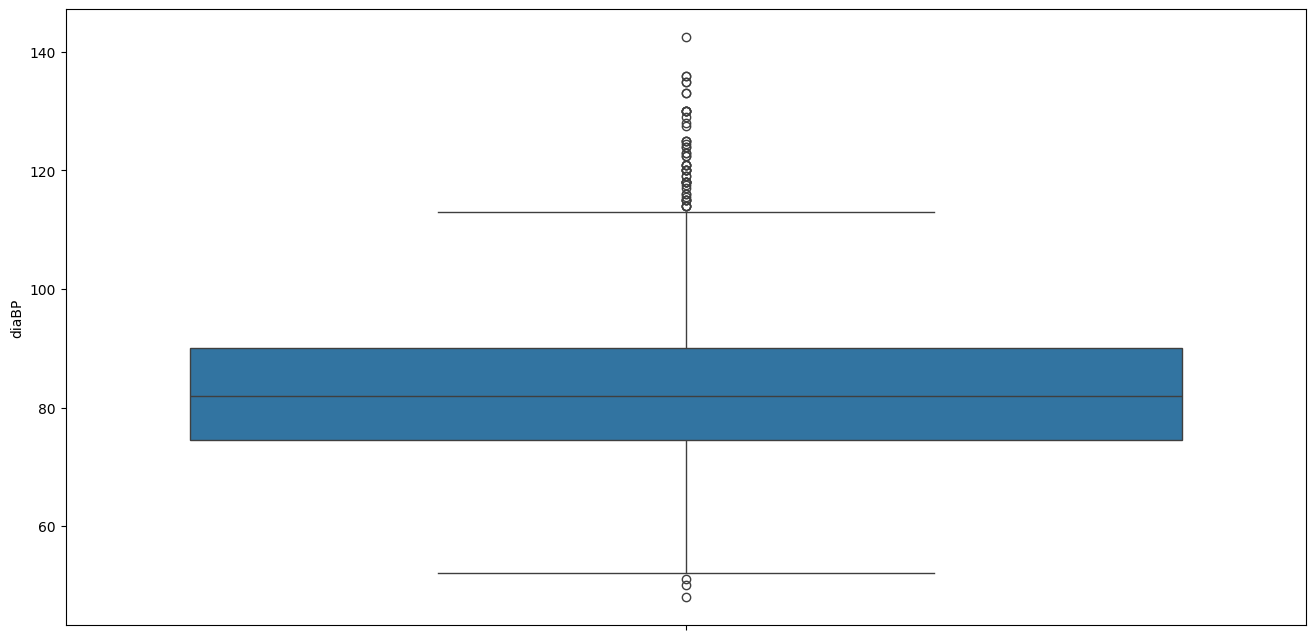

In [224]:
# Chart - 12 visualization code
plt.figure(figsize=(16,8))
sns.boxplot(df['diaBP'])

##### 1. Why did you pick the specific chart?

- We choose this boxplot to understand the outliers that we have in our diaBP column.

##### 2. What is/are the insight(s) found from the chart?

- It will help us in next section to easily finding out outliers.

#### Chart - 13

(array([1.670e+02, 1.067e+03, 1.337e+03, 5.920e+02, 1.500e+02, 4.500e+01,
        1.200e+01, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([15.96 , 20.044, 24.128, 28.212, 32.296, 36.38 , 40.464, 44.548,
        48.632, 52.716, 56.8  ]),
 <BarContainer object of 10 artists>)

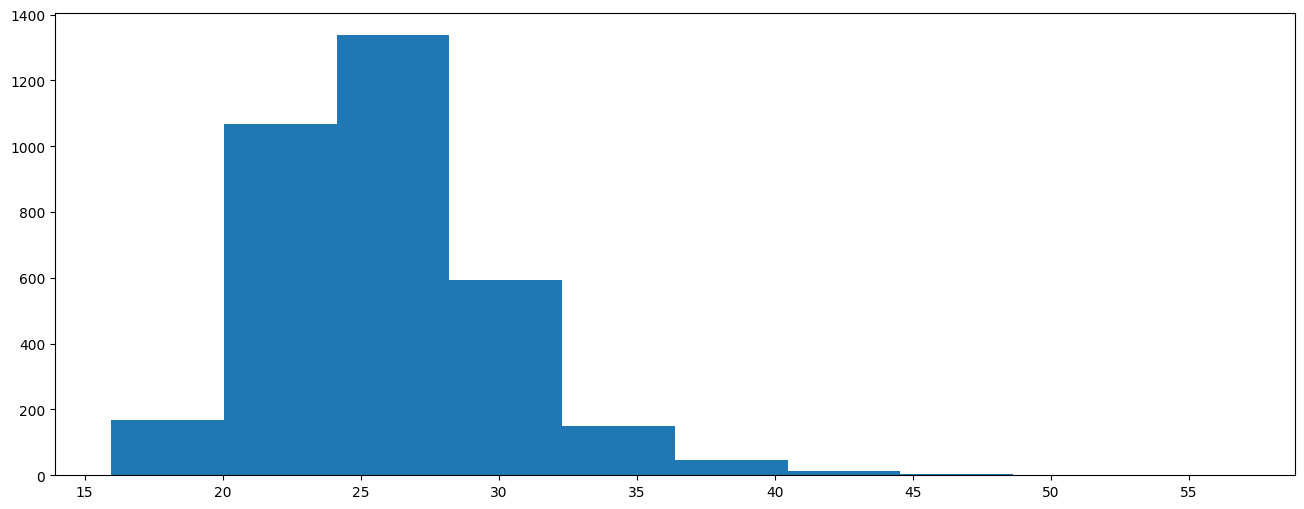

In [225]:
# Chart - 13 visualization code
plt.figure(figsize=(16,6))

x = df['BMI']
plt.hist(x)

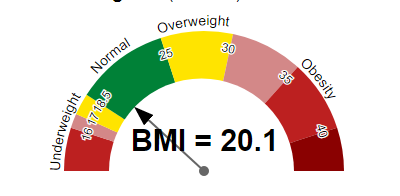

##### 1. Why did you pick the specific chart?

We pick this histogram to understand that how many people are in which range of BMI.

##### 2. What is/are the insight(s) found from the chart?

- According to the above BMI meter we find that people who are in range of 18.5 - 25 are considered Normal.
- we found 1512 people are normal rest are either Underweight, Overweight or Obese.

#### Chart - 14

Total number of people who have good HeartRate (2404, 17)


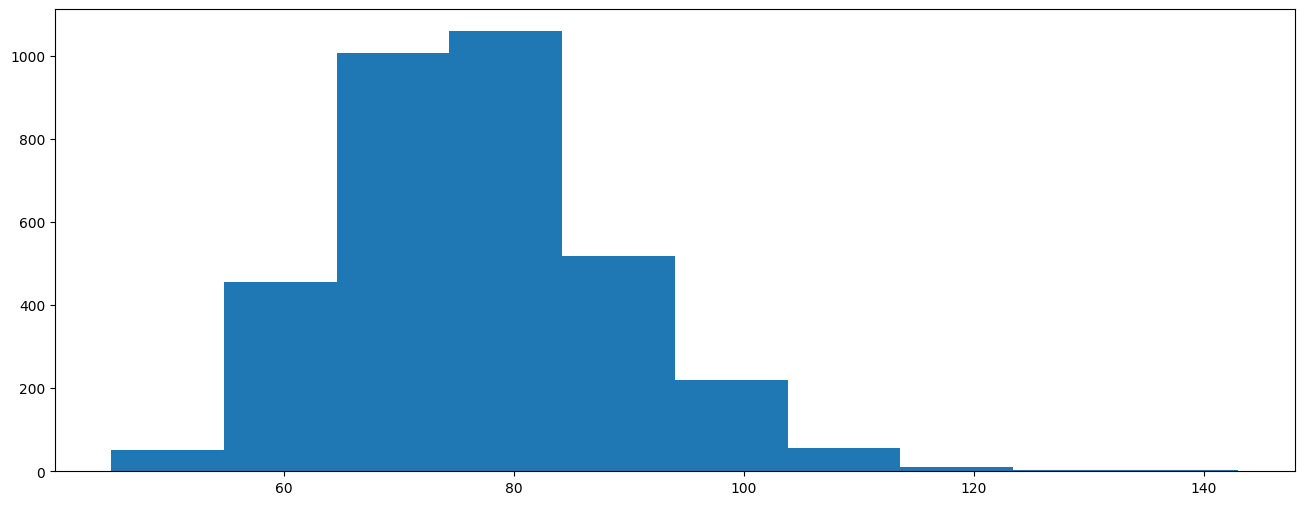

In [226]:
# Chart - 14 visualization code
plt.figure(figsize=(16,6))

x = df['heartRate']
plt.hist(x)

heart_df = df.loc[(df['heartRate']>=70) & (df['heartRate']<= 133)]
print(f'Total number of people who have good HeartRate {heart_df.shape}')

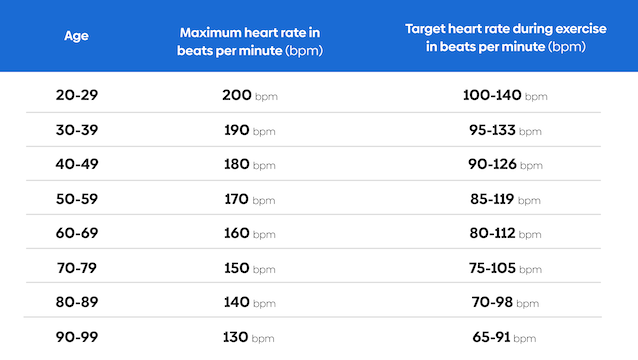

##### 1. Why did you pick the specific chart?

We picked this histogram to find out that in which range(Good, bad or worse) most people are falling.

##### 2. What is/are the insight(s) found from the chart?

- Best HeartRate range is 70 - 133 for the people in our dataset.
- There are 2,404 people who are in the range of Good heartRate/minute.

###Bivariate & Multiariate Analysis


#### Chart - 15 (Numerical - Numerical Analysis)

Help on function scatterplot in module seaborn.relational:

scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)
    Draw a scatter plot with possibility of several semantic groupings.
    
    The relationship between `x` and `y` can be shown for different subsets
    of the data using the `hue`, `size`, and `style` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    `hue` and `style` for the same variable) can be helpful for making
    graphics more accessible.
    
    See the :ref:`tutorial <relational_tutorial>` for more information.


<Axes: xlabel='age', ylabel='cigsPerDay'>

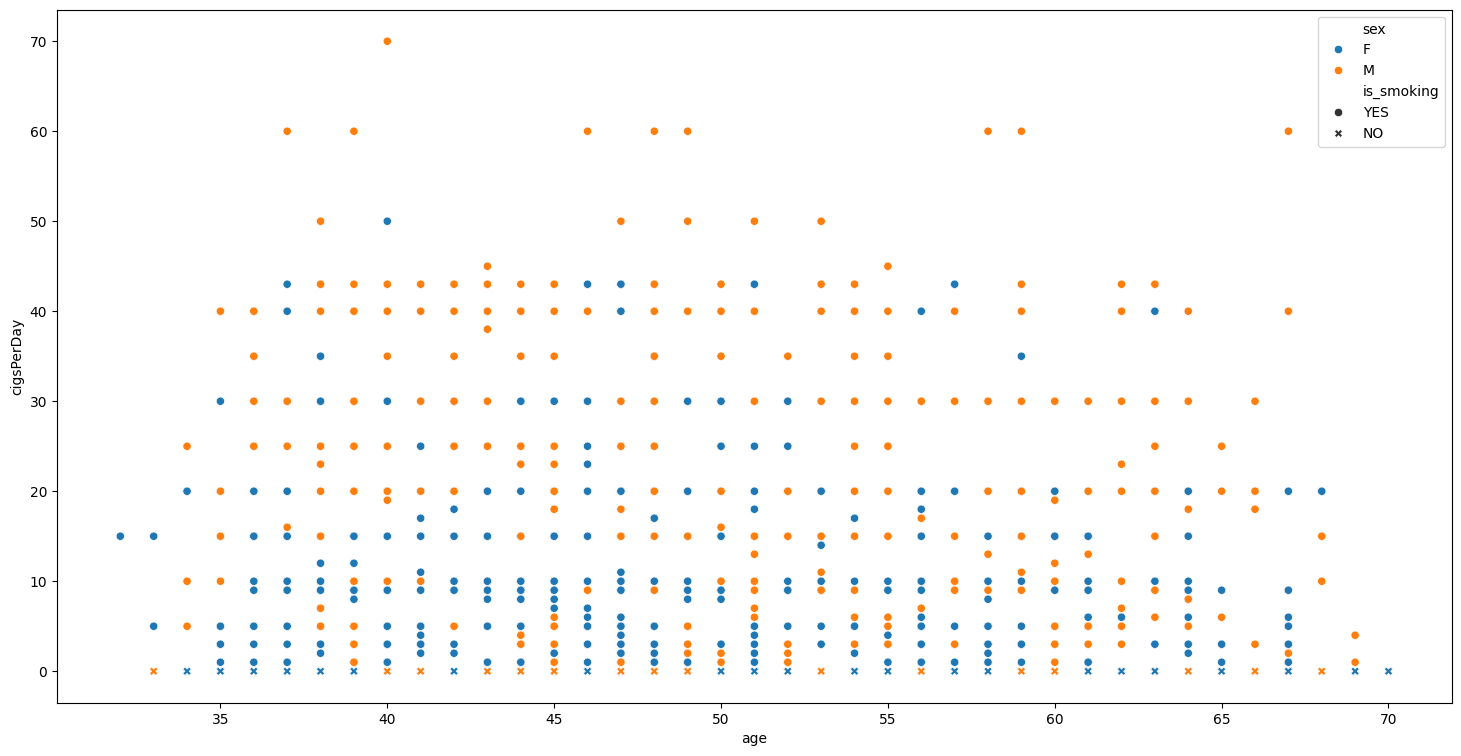

In [230]:
# Chart - 15 visualization code
plt.figure(figsize=(18,9))
help(sns.scatterplot)
sns.scatterplot(data=df, x="age", y="cigsPerDay", hue="sex", style="is_smoking")

##### 1. Why did you pick the specific chart?

- Scatter plot explains individual information in a well defined manner.

##### 2. What is/are the insight(s) found from the chart?

- From the above scatter plot we can say that both men & women in numbers smokes almost equally. but womens are more in number than mens.
- If we just look at the number of ciggrattes consumption than it is very clear that mens are smoking far more than womens.
- There are total of 22 womens and 16 mens who don't smoke.

#### Chart - 16 (Numerical - Numerical Analysis)

<Axes: xlabel='sex', ylabel='age'>

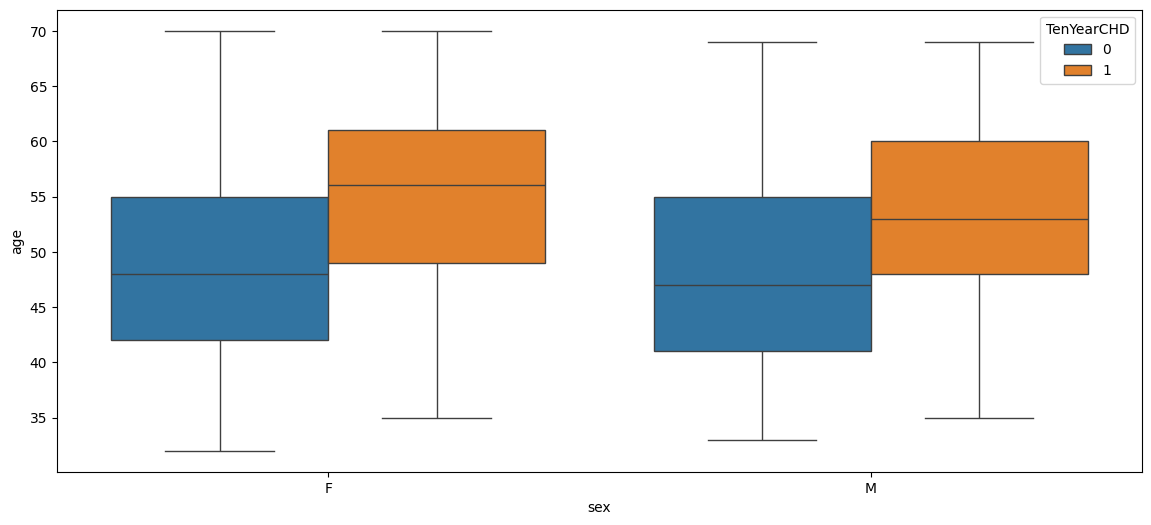

In [237]:
# Chart - 16 visualization code
import seaborn as sns
plt.figure(figsize=(14,6))
sns.boxplot(x="sex", y="age", hue="TenYearCHD", data=df)

##### 1. Why did you pick the specific chart?

- We picked the boxplot which is generally used to find the outliers but we used it to find the Genderwise 10-years CHD.

##### 2. What is/are the insight(s) found from the chart?

- In both males and females from age 42 to 55 people don't have any CHD Probelem but from age around 50-60 people do have CHD problems.

#### Chart - 17 (Numerical - Numerical Analysis)

<Axes: xlabel='age', ylabel='BMI'>

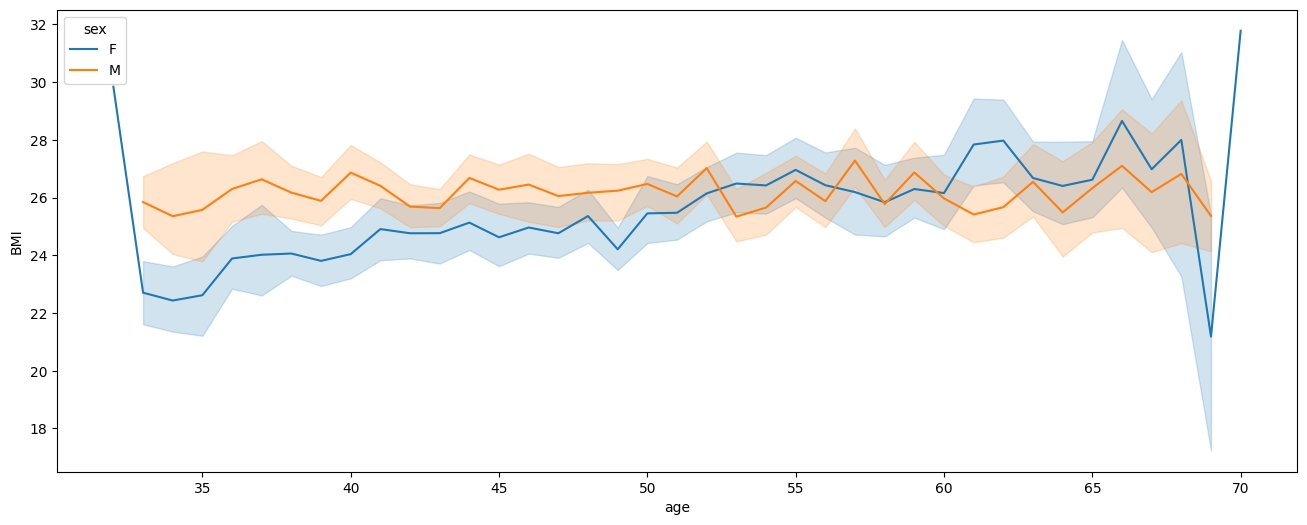

In [238]:
# Chart - 17 visualization code
plt.figure(figsize=(16,6))
# Show the plot
sns.lineplot(x=df['age'], y=df['BMI'], hue=df['sex'])

##### 1. Why did you pick the specific chart?

- We pick this lineplot of seaborn to show the BMI trend according to the age categorised by sex.

##### 2. What is/are the insight(s) found from the chart?

- Till age 53 BMI is increasing in both male and females but after 53 male's BMI is decreasing slightly and in Women's BMI is still rising.

#### Chart - 18 (Numerical - Numerical Analysis)

<Axes: xlabel='age', ylabel='totChol'>

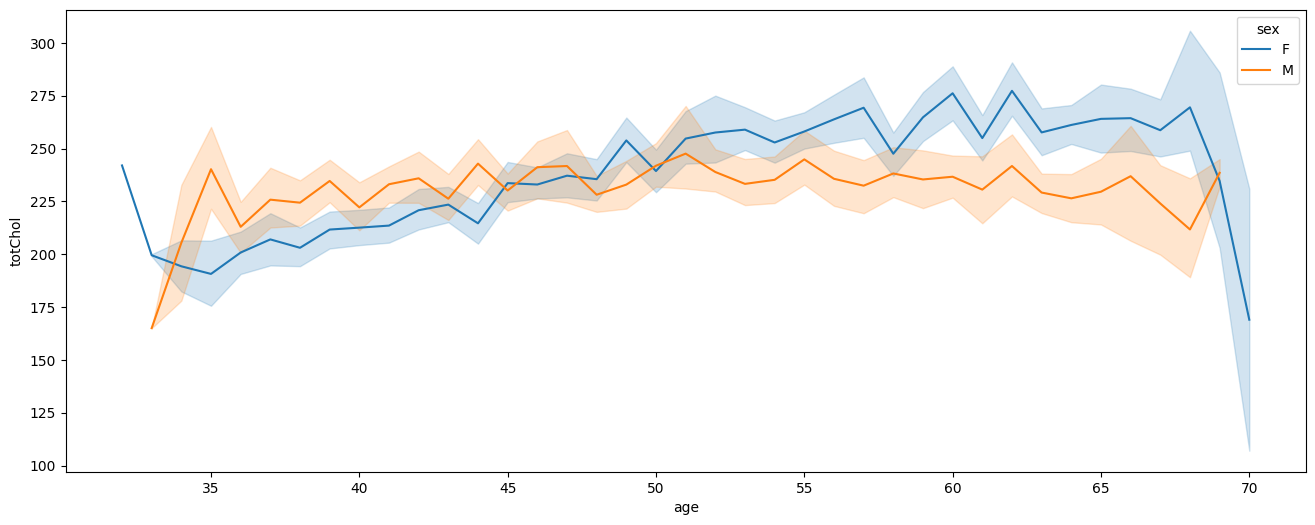

In [239]:
# Chart - 18 visualization code
plt.figure(figsize=(16,6))
# Show the plot
sns.lineplot(x=df['age'], y=df['totChol'], hue=df['sex'])

##### 1. Why did you pick the specific chart?

- To show the balanced or imbalanced total Cholesterol.

##### 2. What is/are the insight(s) found from the chart?

- Total Cholesterol should be below 200.
- Till age 45 both mens and womens have a little higher Cholesterol than necessary (i.e., 200), but after crossing 45 mens Cholesterol is stablizing and womens Cholesterol still rising.

#### Chart - 19

<Axes: xlabel='age', ylabel='glucose'>

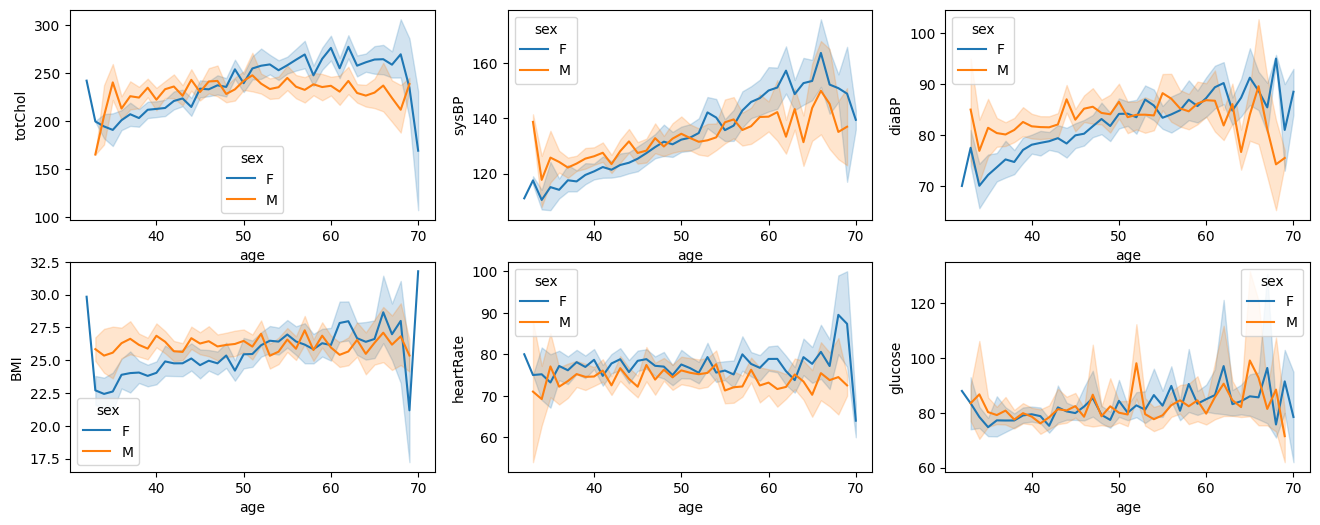

In [240]:
plt.figure(figsize=(16,6))
plt.subplot(2,3,1)
sns.lineplot(x=df['age'], y=df['totChol'], hue=df['sex'])

plt.subplot(2,3,2)
sns.lineplot(x=df['age'], y=df['sysBP'], hue=df['sex'])

plt.subplot(2,3,3)
sns.lineplot(x=df['age'], y=df['diaBP'], hue=df['sex'])

plt.subplot(2,3,4)
sns.lineplot(x=df['age'], y=df['BMI'], hue=df['sex'])

plt.subplot(2,3,5)
sns.lineplot(x=df['age'], y=df['heartRate'], hue=df['sex'])

plt.subplot(2,3,6)
sns.lineplot(x=df['age'], y=df['glucose'], hue=df['sex'])

#### Chart - 20 - Correlation Heatmap

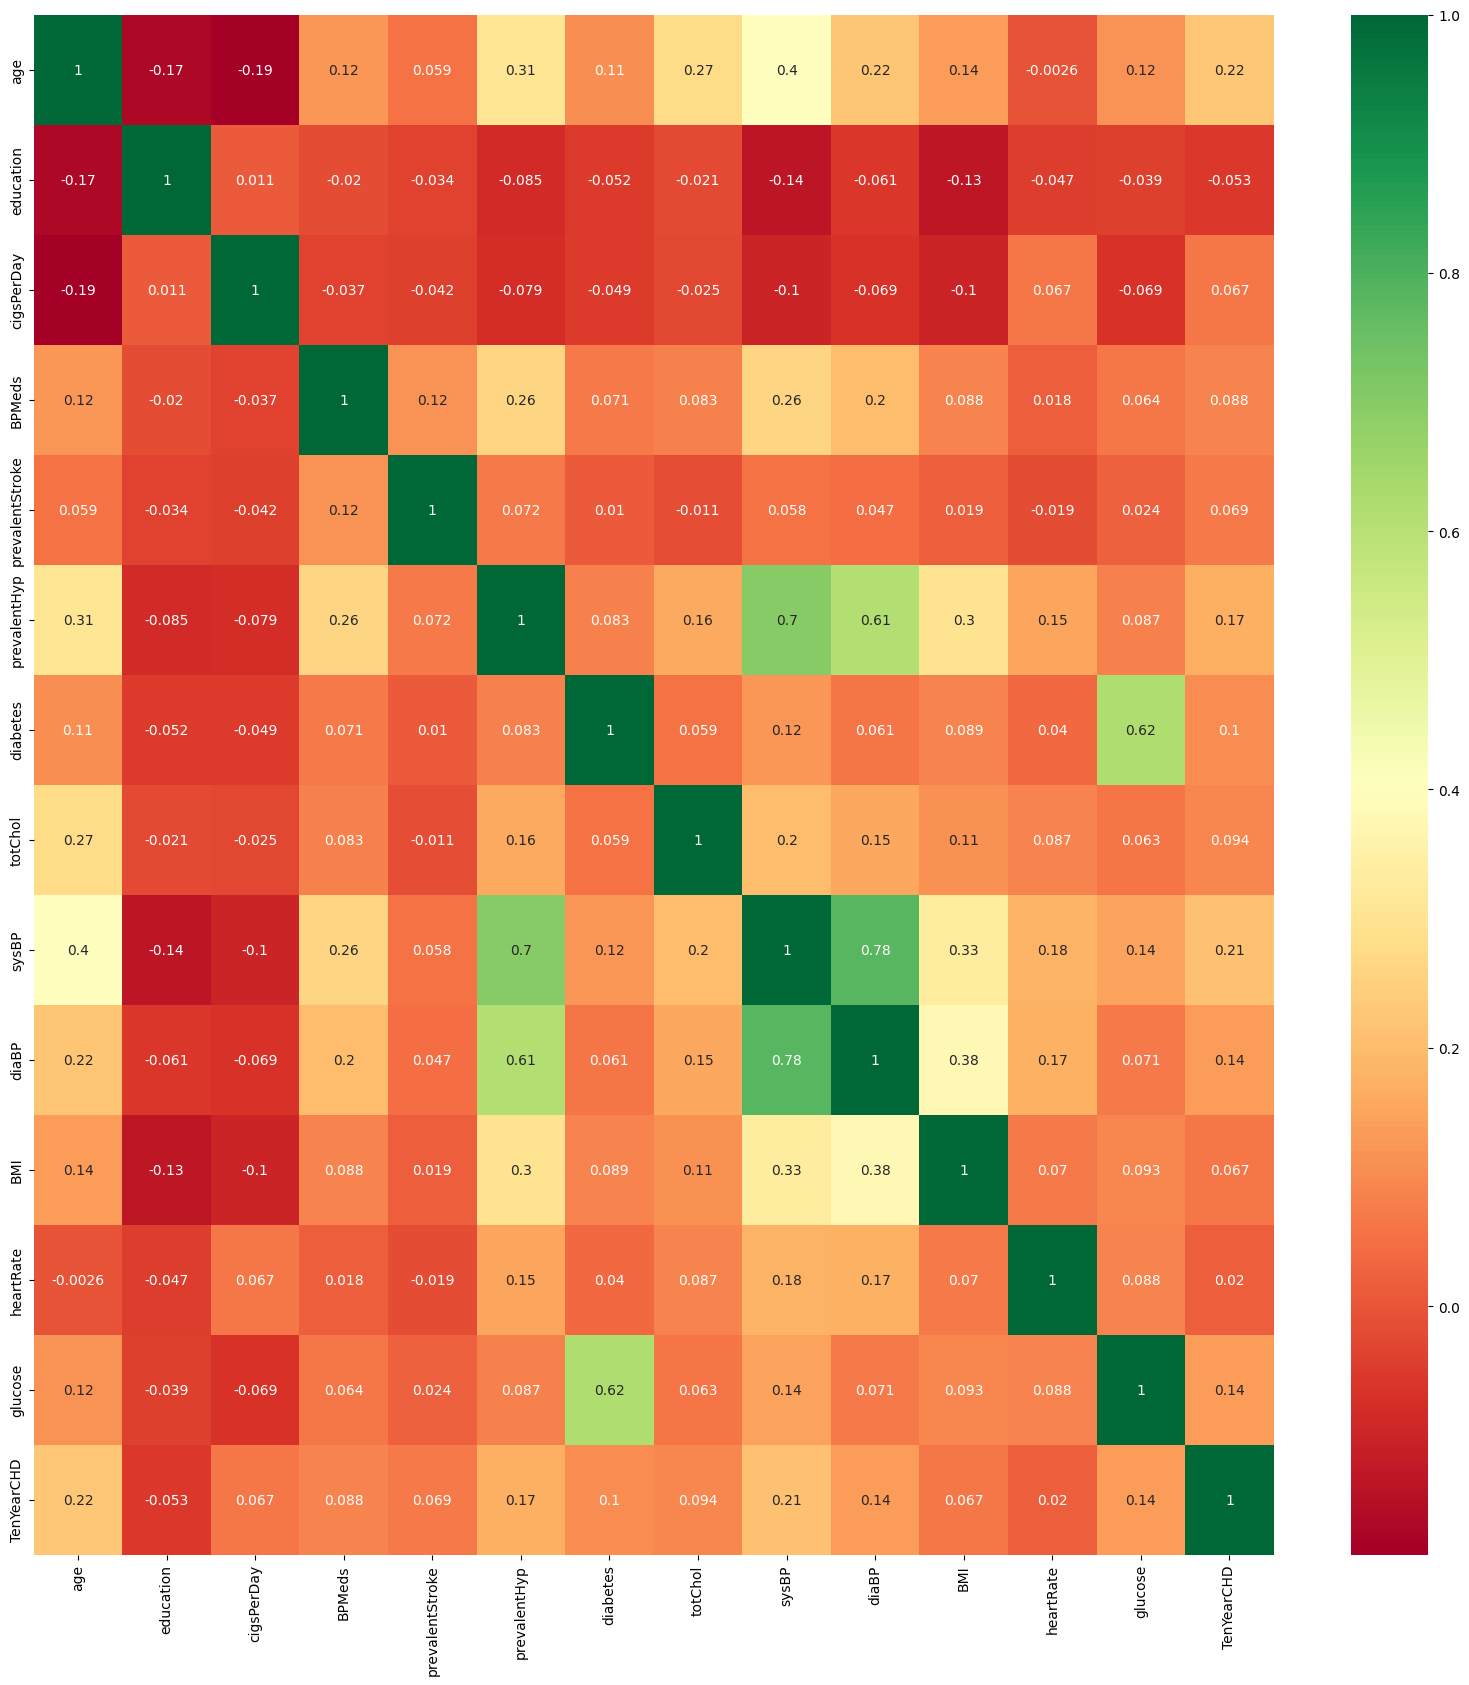

In [241]:
# Correlation Heatmap visualization code
h = df.drop(['id', 'education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes'], axis=1)

h = df.drop(['id','sex','is_smoking'], axis=1)
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = h.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(h[top_corr_features].corr(),annot=True,cmap="RdYlGn")

##### 1. Why did you pick the specific chart?

- correlation heat map shows the relation between two different columns and it also shows that how strong or weak the relation is.

##### 2. What is/are the insight(s) found from the chart?

- There is a strong positive co-relation between " sysBP & diaBP " 0.78.
- There is a good co-relation between " sysBP & prevalentHyp " 0.70.
- There is a good co-relation between " Diabetes & Glucose " 0.62.
- There is a co-relation between " diaBP & prevalentHyp " 0.61.

## ***5. Data Pre-processing and Feature Engineering***

### 1. Categorical Encoding

In [242]:
# Defining 3 lists containing the column names of
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables
# This is defined based on the number of unique values for each attribute.

dependent_var = ['TenYearCHD']
continuous_var = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

In [243]:
# Encode your categorical columns
# Encoding into binary columns

df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)

#### What all categorical encoding techniques have you used & why did you use those techniques?

- We used the binary Encoding to transform the Categorical columns into Binary ones.


### 2. Handling Missing Values

In [248]:
# Handling Missing Values & Missing Value Imputation
print(f" Total missing values {df.isna().sum().sum()}")
df.isna().sum()

 Total missing values 379


age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

**2.1.  Replacing the missing values in the categorical columns with the most repeated value:**

In [247]:
# Replacing the missing values in the categorical columns with its mode (most repeated value)

import pandas as pd

# Assuming you have loaded data into the DataFrame df
# Display the first few rows of the DataFrame
print(df.head())

# Display the column names of the DataFrame
print(df.columns)

# Drop the 'id' column
df.drop('id', axis=1, inplace=True)

# Fill missing values in the 'education' column with the mode
df['education'] = df['education'].fillna(df['education'].mode()[0])

# Fill missing values in the 'BPMeds' column with the mode
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])


   id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0    0           1         3.0     0.0                0   
1   1   36        4.0    1           0         0.0     0.0                0   
2   2   46        1.0    0           1        10.0     0.0                0   
3   3   50        1.0    1           1        20.0     0.0                0   
4   4   64        1.0    0           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2 

In [ ]:
# education distribution after mode imputation
df.education.value_counts()

In [245]:
# bp_meds distribution after mode imputation
df.BPMeds.value_counts()

BPMeds
0.0    3246
1.0     100
Name: count, dtype: int64

**2.2. cigs_per_day:**

In [244]:
# Mean and median number of cigarettes per day
df.cigsPerDay.mean().round(0),df.cigsPerDay.median()

(9.0, 0.0)

In [246]:
# All missing values in the cigs_per_day column
df[df['cigsPerDay'].isna()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,0,1,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,1,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,1,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,0,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,1,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,0,1,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,NaN,0,1,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


**From the above table, , we find that for every single missing values in cigsPerDay, the patients reported that they smoke.**

In [249]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
df[df['is_smoking']==1]['cigsPerDay'].mean(),df[df['is_smoking']==1]['cigsPerDay'].median()


(18.345945945945946, 20.0)

<ipython-input-250-cb56e27bf531>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_smoking']==1]['cigsPerDay'])


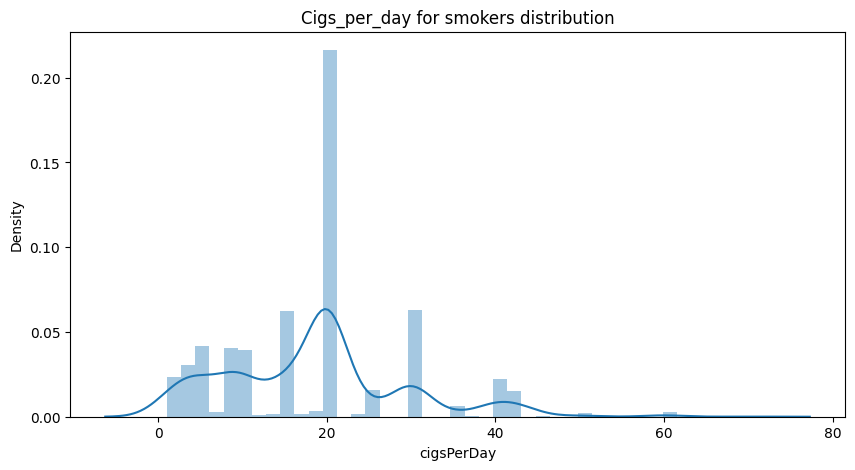

In [250]:
# distribution of number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.distplot(df[df['is_smoking']==1]['cigsPerDay'])
plt.title('Cigs_per_day for smokers distribution')
plt.show()


<Axes: ylabel='cigsPerDay'>

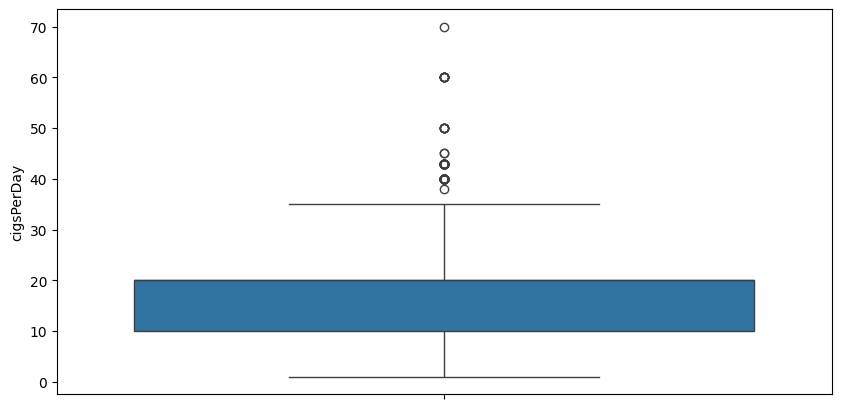

In [251]:
# box plot for the number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.boxplot(df[df['is_smoking']==1]['cigsPerDay'])

**Since the number of cigarettes smoked by the patients who smoke contains outliers, the missing values in ths cigs_per_day column can be imputed with its median value.**

In [254]:
# Imputing the missing values in the cigs_per_day
df['cigsPerDay'] = df['cigsPerDay'].fillna(df[df['is_smoking']==1]['cigsPerDay'].median())

In [253]:
# Checking for any wrong entries where the patient is not a smoker and cigarettes per day above 0

df[(df['is_smoking']==0) & (df['cigsPerDay']>0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [252]:

# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

df[(df['is_smoking']==1) & (df['cigsPerDay']==0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


**There are no errors in the above 2 columns**

**2.3. total_cholestrol, bmi, heart_rate:**

<ipython-input-255-c3f6597c60b3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


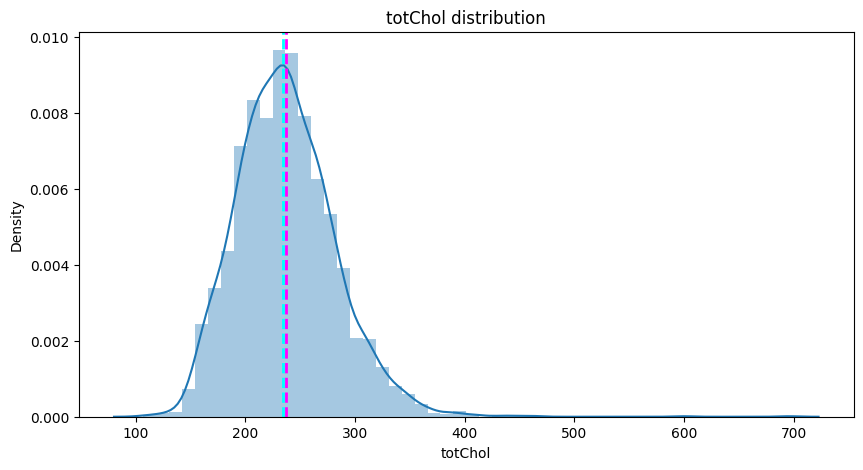

<ipython-input-255-c3f6597c60b3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


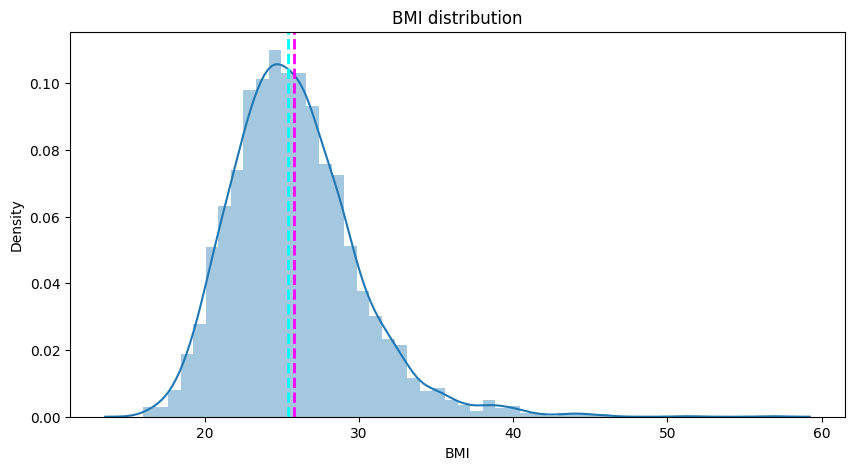

<ipython-input-255-c3f6597c60b3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


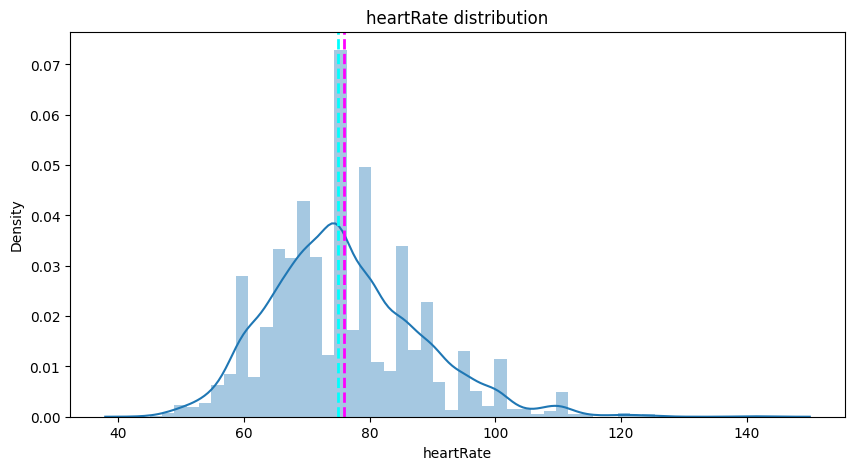

In [255]:
# Checking the distribution of the total_cholesterol, bmi, and heart_rate
for i in ['totChol','BMI','heartRate']:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])
  plt.axvline(df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[i].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(i+' distribution')
  plt.show()


**The totChol, BMI, and heartRrate columns are positively skewed**

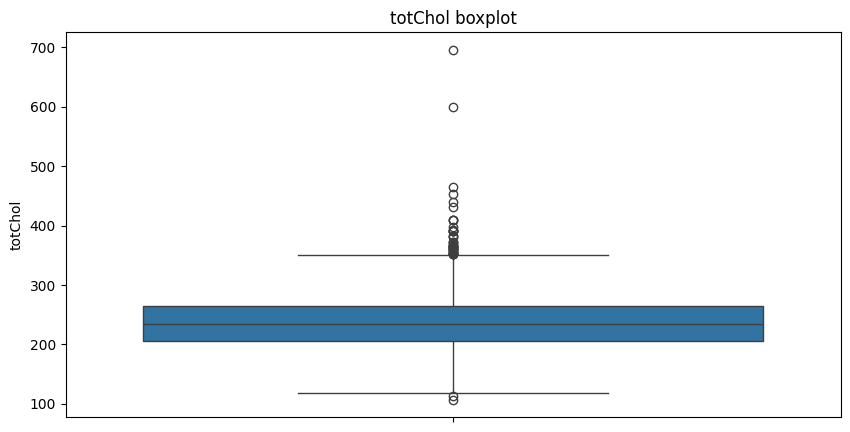

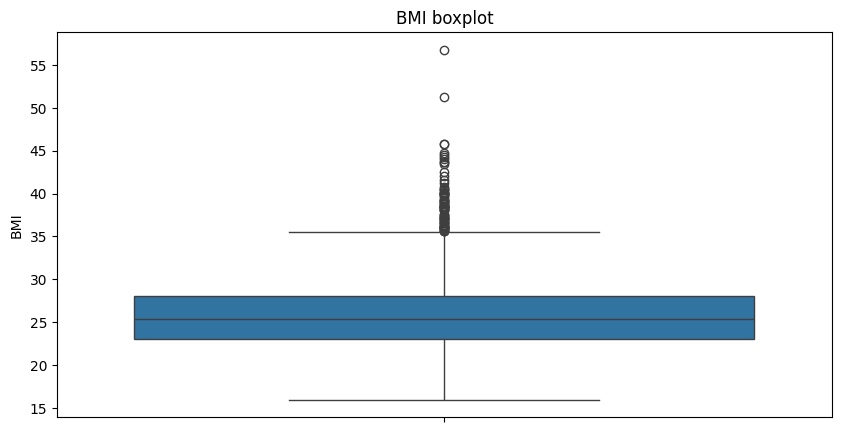

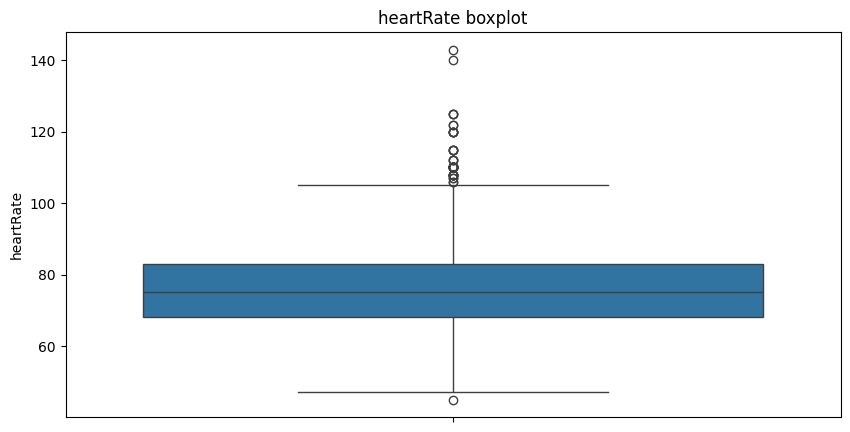

In [256]:
# Checking outliers in total_cholesterol, bmi, heart_rate columns
for i in ['totChol','BMI','heartRate']:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[i])
  plt.title(i+' boxplot')
  plt.show()

In [257]:

# Mean and median for total_cholesterol
df.totChol.mean(),df.totChol.median()

(237.07428400954655, 234.0)

In [258]:
# Mean and median for BMI
df.BMI.mean(),df.BMI.median()

(25.7949644549763, 25.38)

In [259]:
# Mean and median for heart_rate
df.heartRate.mean(),df.heartRate.median()

(75.97727943346119, 75.0)

In [261]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
df['totChol']   = df['totChol'].fillna(df['totChol'].median())
df['BMI']       = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [260]:
# mean and median of totChol after median imputation
df.totChol.mean(),df.totChol.median()

(237.07428400954655, 234.0)

In [262]:
# mean and median of BMI after median imputation
df.BMI.mean(),df.BMI.median()


(25.793250737463126, 25.38)

In [263]:
# mean and median of heartRate after median imputation
df.heartRate.mean(),df.heartRate.median()

(75.97699115044247, 75.0)

**2.4. glucose:**

In [264]:
# total missing values in glucose
df.glucose.isna().sum()

304

<ipython-input-265-e147f2600c2b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['glucose'])


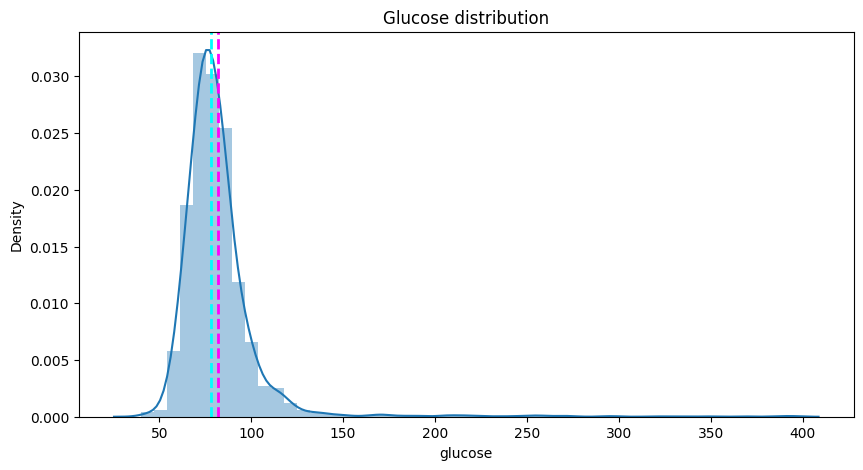

In [265]:
# distribution of glucose
plt.figure(figsize=(10,5))
sns.distplot(df['glucose'])
plt.axvline(df['glucose'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['glucose'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Glucose distribution')
plt.show()

**The glucose column is positively(right) skewed.**

Text(0.5, 1.0, 'Glucose boxplot')

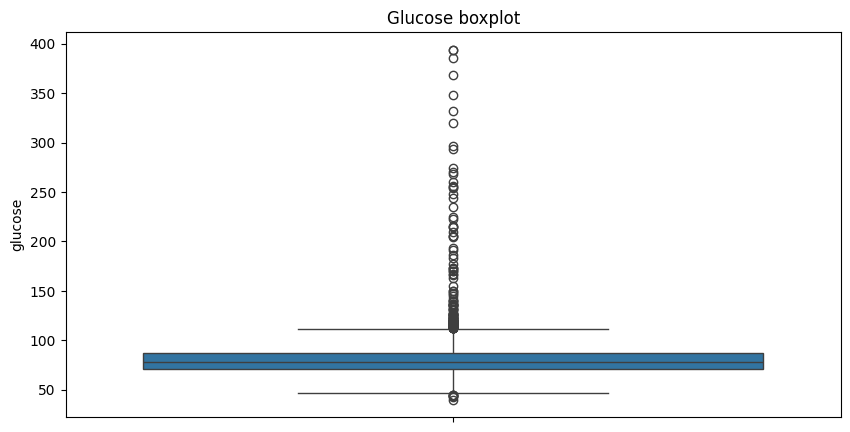

In [266]:
# Outliers in glucose
plt.figure(figsize=(10,5))
sns.boxplot(df['glucose'])
plt.title('Glucose boxplot')

**The glucose column contains quite many outliers.**

In [267]:
# Mean, median, and mode for glucose
df.glucose.mean(),df.glucose.median(),df.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

- The distribution is positively skewed, with outliers.
- There are 304 missing values in the glucose column. If we choose to impute them with a single value of mean / median, we will be adding high bias at that point.
- To avoid this we can impute the missing values using KNN imputer.

In [268]:
# Using KNN imputer with K=10
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [269]:
# checking for missing values
df.isna().sum(), print(f" Total number of rows and columns are =",{df.shape})

 Total number of rows and columns are = {(3390, 16)}


(age                0
 education          0
 sex                0
 is_smoking         0
 cigsPerDay         0
 BPMeds             0
 prevalentStroke    0
 prevalentHyp       0
 diabetes           0
 totChol            0
 sysBP              0
 diaBP              0
 BMI                0
 heartRate          0
 glucose            0
 TenYearCHD         0
 dtype: int64,
 None)

**We have successfully handled all the missing values in the dataset.**

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   float64
 1   education        3390 non-null   float64
 2   sex              3390 non-null   float64
 3   is_smoking       3390 non-null   float64
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   float64
 7   prevalentHyp     3390 non-null   float64
 8   diabetes         3390 non-null   float64
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   float64
dtypes: float64(16)
memory usage: 423.9 KB


The KNN imputer has converted all the columns to the float64 datatype. Hence, changing the column datatype accordingly as per the kind of data stored in the respective column.

In [272]:
# changing datatypes
df = df.astype({'age': int, 'education':int,'sex':int,'is_smoking':int,'cigsPerDay':int,
               'BPMeds':int,'prevalentStroke':int,'prevalentHyp':int,'diabetes':int,
               'totChol':float,'sysBP':float,'diaBP':float,
               'BMI':float,'heartRate':float,'glucose':float,'TenYearCHD':int})

#### What all missing value imputation techniques have you used and why did you use those techniques?

- We had total 510 null values in our dataset in 7 different columns.
- First of all we impute the categorical columns (education & BPMeds) with mode.
- Second in cigsPerDay column we seperated smokers and non smokers , then we found the null_values in smokers and later on imputed with Median.
- Third we imputed the tooChol, BMI & heartRate with Median.
- At last glucose column had the max. null values and outliers, so imputing these values with mean, median and mode will add high bias. so we used the KNN imputer k=10.
-**After KNN imputation, there is no massive change in the values of mean. And the values of median and mode remain the same.**  

**2.5. Feature Manipulation**

TenYearCHD
0             2879
1              511
Name: count, dtype: int64

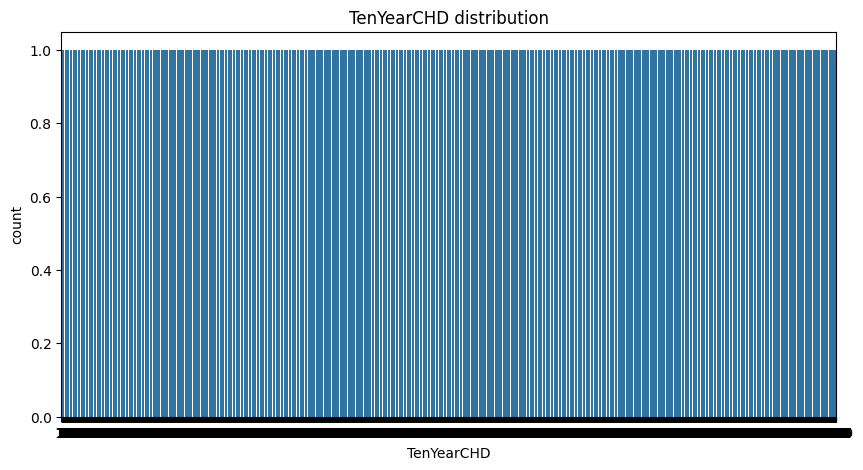

In [273]:
# Distribution of dependent varaible - ten_year_chd
plt.figure(figsize=(10,5))
sns.countplot(df[dependent_var[0]])
plt.xlabel(dependent_var[0])
plt.title(dependent_var[0]+' distribution')

# Distribution of TenYearCHD
df[dependent_var].value_counts()

In [274]:
# unbalanced distribution
511/(2879+511)

0.15073746312684366

**The dependent variable - 10-year risk of coronary heart disease is unbalanced. Only ~15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.**

#### 2. Feature Selection

In [275]:
# Creating a new column pulse_pressure and dropping sysBP and diaBP

df['pulse_pressure'] = df['sysBP']-df['diaBP']
df.drop('sysBP',axis=1,inplace=True)
df.drop('diaBP',axis=1,inplace=True)


Pulse Pressure = Systolic BP - Diastolic BP

[Reference](https://https://my.clevelandclinic.org/health/symptoms/21629-pulse-pressure)

From the above resource, we also found that:

- The normal pulse pressure is around 40 mmHg
- Pulse pressures of 50 mmHg or more can increase the risk of heart disease, -  heart rhythm disorders, stroke and more.
- Higher pulse pressures are also thought to play a role in eye and kidney damage from diseases like diabetes.
- Low pulse pressure - is where the pulse pressure is one-fourth or less of the systolic blood pressure.
- This happens when your heart isn’t pumping enough blood, which is seen in heart failure and certain heart valve diseases. It also happens when a person has been injured and lost a lot of blood or is bleeding internally.

In [276]:
# columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'pulse_pressure'],
      dtype='object')

<ipython-input-277-c02f8a86836c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pulse_pressure'])


Text(0.5, 1.0, 'Pulse Pressure Distribution')

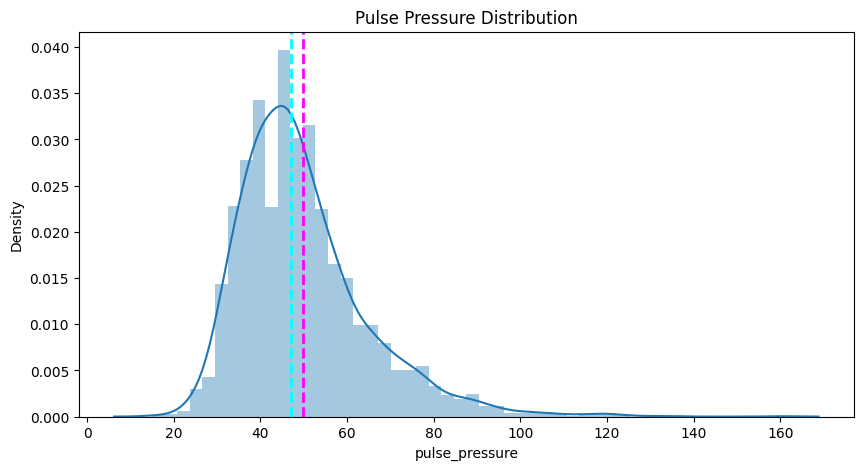

In [277]:
# Analyzing the distribution of pulse_pressure
plt.figure(figsize=(10,5))
sns.distplot(df['pulse_pressure'])
plt.axvline(df['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Pulse Pressure Distribution')



**The pulse pressures are positively skewed**

<Figure size 1000x500 with 0 Axes>

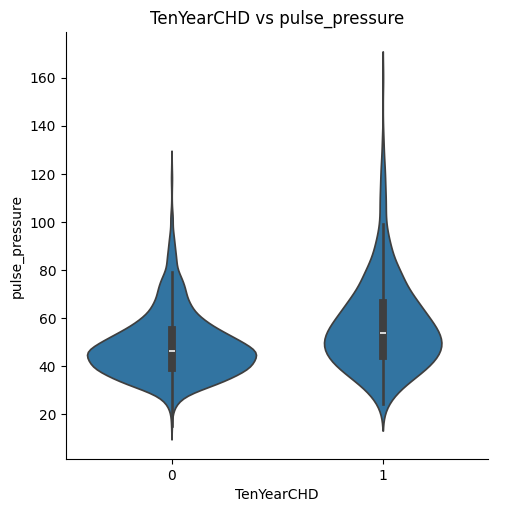

In [278]:
# Relationship between pulse pressure with the dependent variable
plt.figure(figsize=(10,5))
sns.catplot(x=dependent_var[0],y='pulse_pressure',data=df,kind='violin')
plt.title('TenYearCHD vs pulse_pressure')
plt.show()


**On average, the patients with higher pulse pressure are exposed to the coronary heart disease over the period of 10 years.**

### 3. Handling Outliers

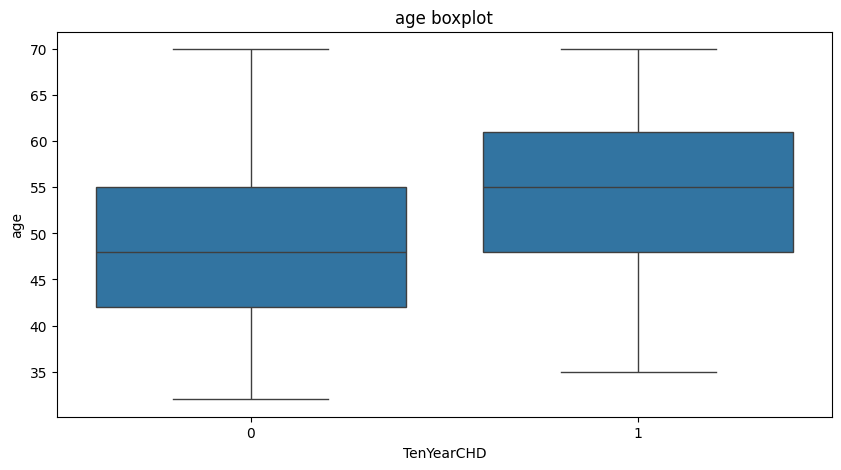

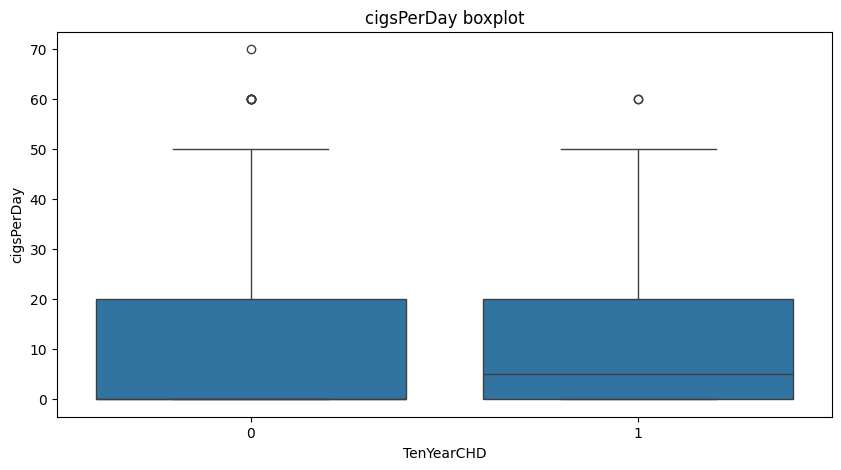

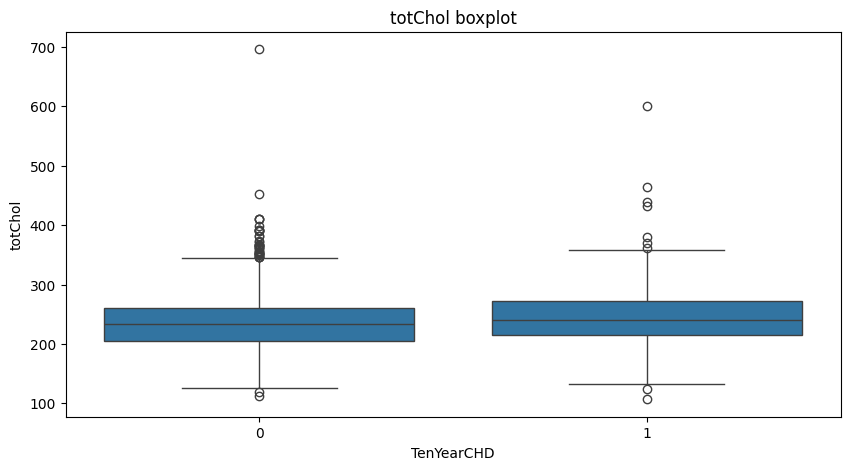

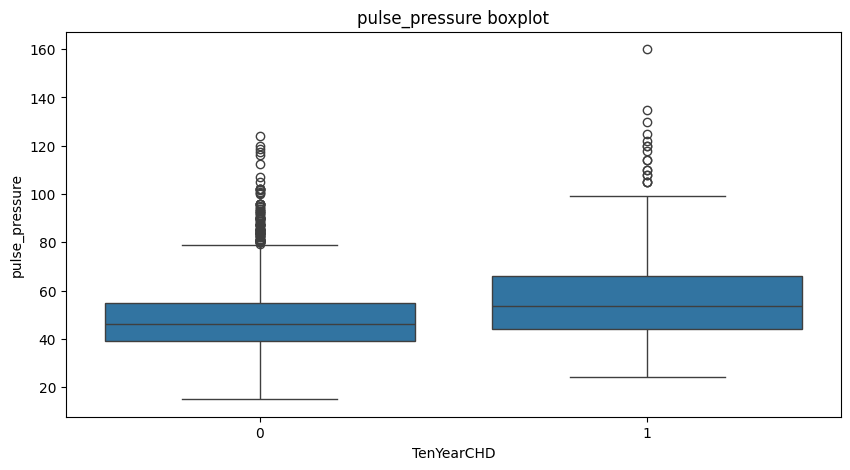

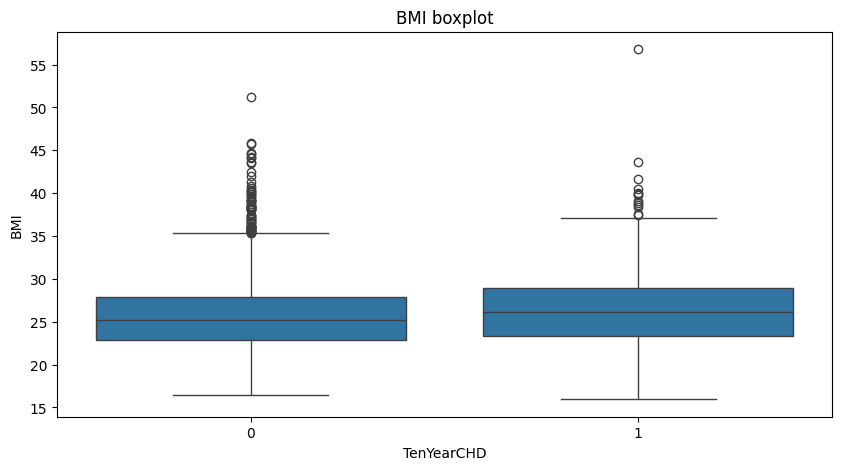

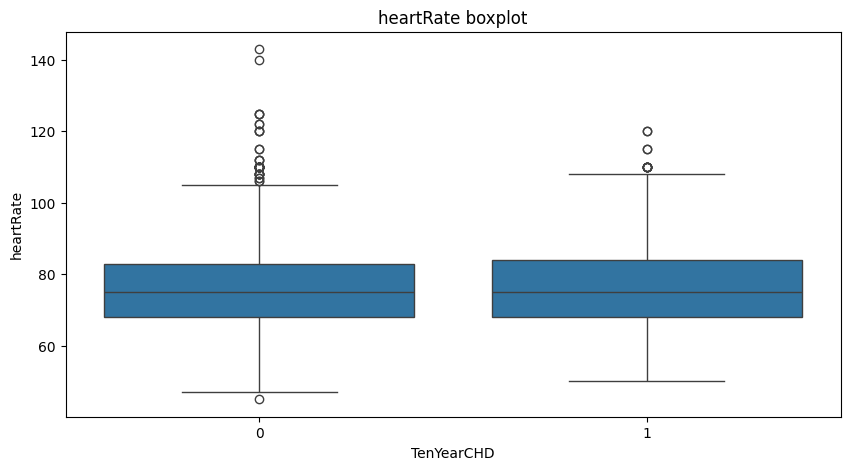

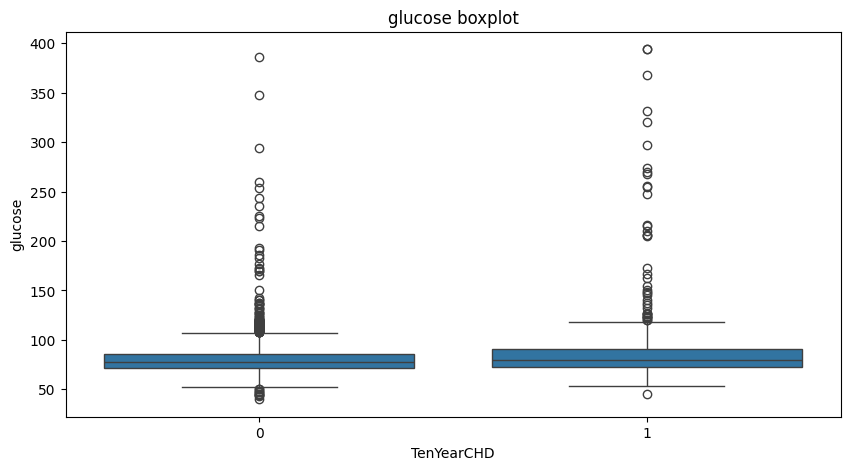

In [279]:
# checking for outliers in continuous features
continuous_var2 = ['age','cigsPerDay','totChol', 'pulse_pressure', 'BMI', 'heartRate', 'glucose']
for col in continuous_var2:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=df)
  plt.title(col+' boxplot')
  plt.show()


- **There are outliers in the data, the effect of the outliers can be reduced to some extent by transforming it.**
- **Once the data is transformed, if outliers beyond 3 standard deviations from the mean still remain, then they can be imputed with its respective median value.**
- **This is done on the train data only to prevent data leakage.**

### 4. Data Transformation


**Transforming continuous variables to reduce skew:**

In [280]:
# Transform Your data
# skewness along the index axis
(df[continuous_var2]).skew(axis = 0)

age               0.225796
cigsPerDay        1.204077
totChol           0.948170
pulse_pressure    1.412382
BMI               1.025551
heartRate         0.676660
glucose           6.361911
dtype: float64

**Many continuous variables are skewed. By log transformation, we aim to reduce the magnitude of skew in these variables to a certain extent.**

In [281]:
# Skew for log10 transformation
np.log10(df[continuous_var2]+1).skew(axis = 0)

age              -0.015053
cigsPerDay        0.275072
totChol           0.011860
pulse_pressure    0.354174
BMI               0.370422
heartRate         0.165898
glucose           2.310918
dtype: float64

We can clearly see that by log transformation of the continuous variables, we are able to reduce it's skew to some extent.

In [282]:
# Checking skew after log transformation
df[continuous_var2].skew(axis = 0)


age               0.225796
cigsPerDay        1.204077
totChol           0.948170
pulse_pressure    1.412382
BMI               1.025551
heartRate         0.676660
glucose           6.361911
dtype: float64

**4.1. Analyzing the distribution of transformed features:**

<ipython-input-283-4ed9bde8b4fc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


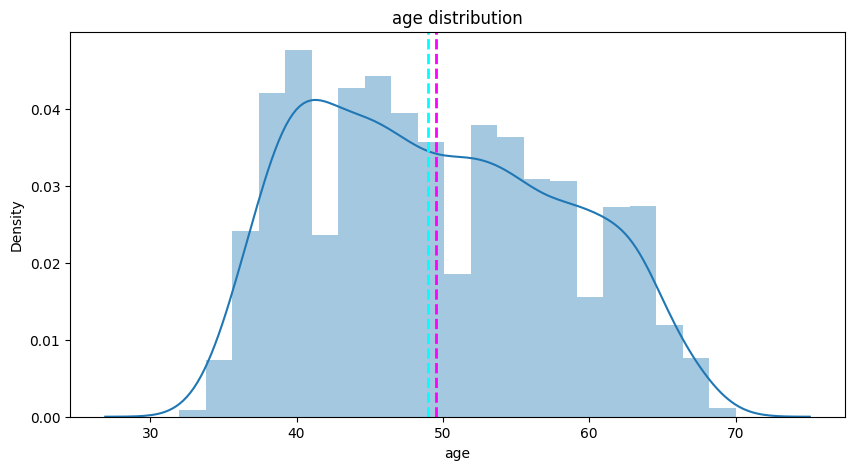

<ipython-input-283-4ed9bde8b4fc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


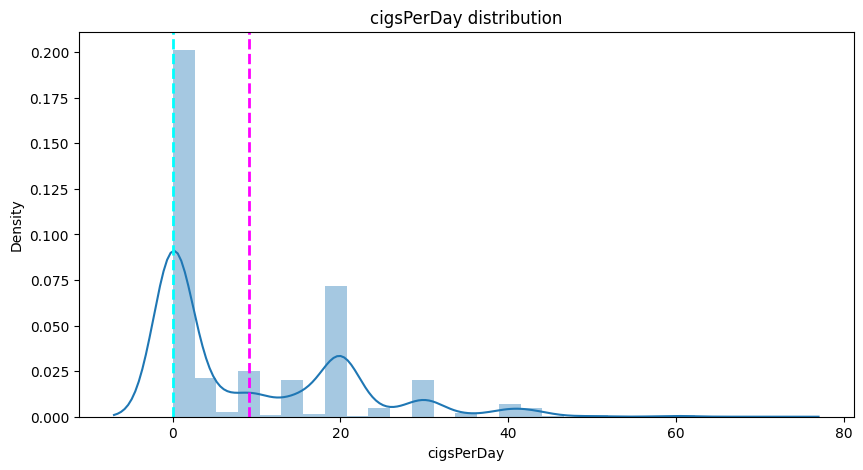

<ipython-input-283-4ed9bde8b4fc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


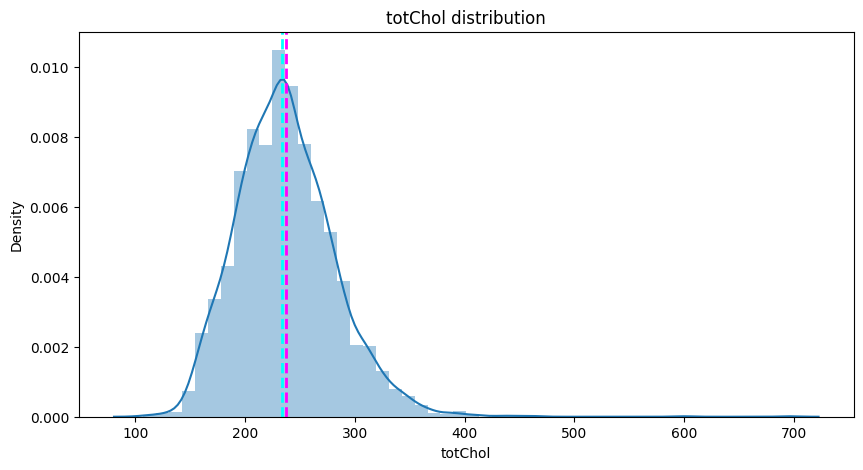

<ipython-input-283-4ed9bde8b4fc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


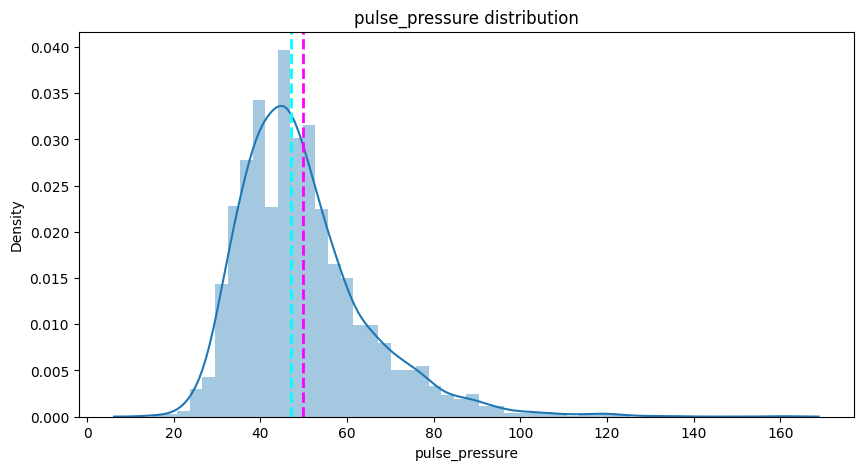

<ipython-input-283-4ed9bde8b4fc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


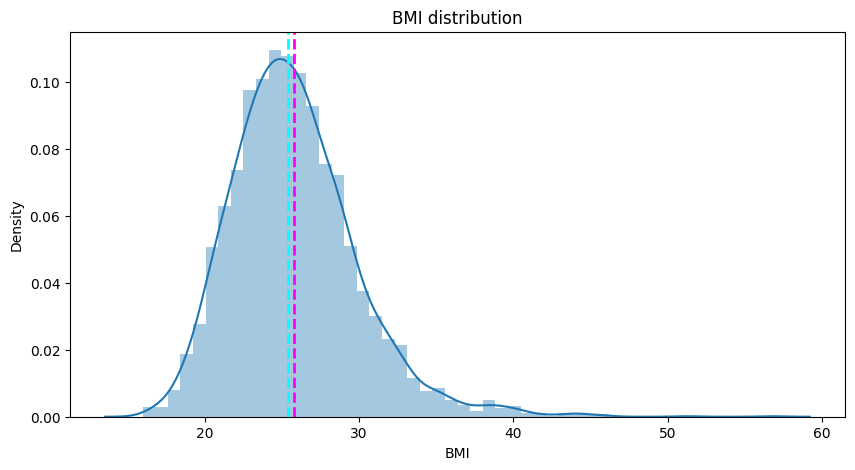

<ipython-input-283-4ed9bde8b4fc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


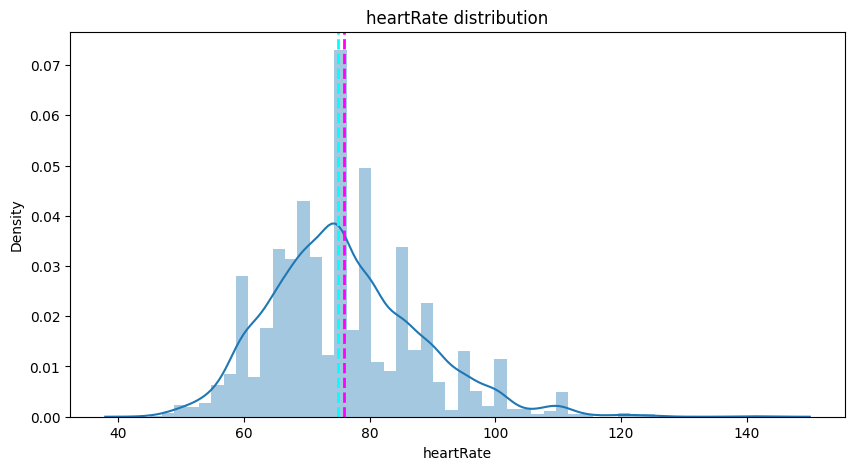

<ipython-input-283-4ed9bde8b4fc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


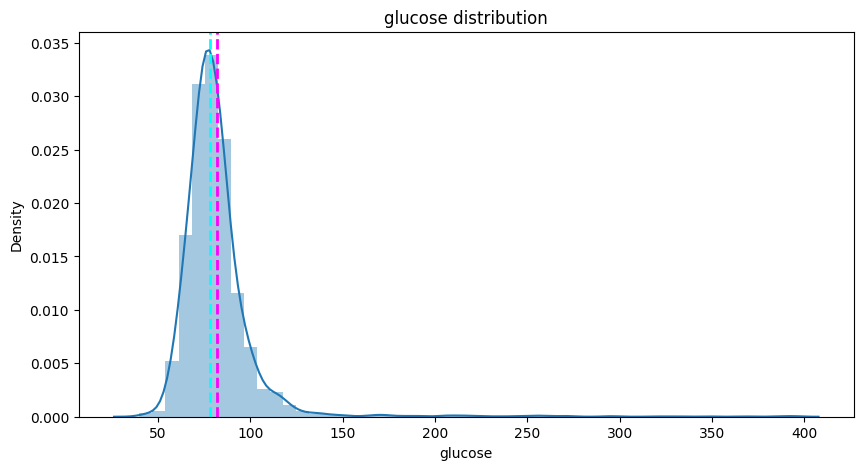

In [283]:
# Analysing the distribution of continuous varaibles after transformation
for col in continuous_var2:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

**About outliers in transformed features:**

- **Except for age and cigs_per_day columns, rest of the numerical columns contain outliers even after log transformation.**
- **To handle this, we can impute the outliers beyond 3 standard deviations from the mean with its median value on the train data.**

### 6. Data Scaling

In [284]:
# Scaling your data
from sklearn.preprocessing import RobustScaler

#Dropping dependent column
df_sc = df.drop(['TenYearCHD'],axis=1)

#running for loop for applying RobustScaler to each column
for col in df_sc:
  Ro_scaler = RobustScaler()
  df[col] = Ro_scaler.fit_transform(df[[col]])


In [285]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulse_pressure
0,1.071429,0.0,0.0,1.0,0.15,0.0,0.0,0.0,0.0,-0.224138,0.000000,1.000000,0.142857,1,1.00000
1,-0.928571,1.0,1.0,0.0,0.00,0.0,0.0,1.0,0.0,-0.379310,0.883744,-0.200000,-0.214286,0,1.43750
2,-0.214286,-0.5,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.275862,-1.012582,0.866667,1.142857,0,-0.12500
3,0.071429,-0.5,1.0,1.0,1.00,0.0,0.0,1.0,0.0,-0.017241,0.579768,-0.466667,1.142857,1,1.43750
4,1.071429,-0.5,0.0,1.0,1.50,0.0,0.0,0.0,0.0,0.120690,0.209361,-0.333333,-0.071429,0,0.28125



- **We used the RobustScaler method**
- **we use RobustScaler method because in our data there are still some outliers**
- **RobustScaler method works great on outliers**


### 5. Data Splitting

8.1. Choice of prediction model:
- We are working on binary classification problem.
- Here we can start with a simple model, as a baseline model, which is interpretable, ie, Logistic Regression
- Try other standard binary classification models like K nearest neighbors, Naive Bayes, decision tree classifier, and support vector machines.
- Use ensemble models, with hyperparameter tuning to check whether they give better predictions.

In [286]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Creating the dataset with all independent variables
X = df.drop('TenYearCHD',axis=1)

# Creating the dataset with the dependent variable
Y = df['TenYearCHD']

### 6. Handling Imbalanced Dataset

<ipython-input-287-08acd770f669>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['Not CHD','CHD'])


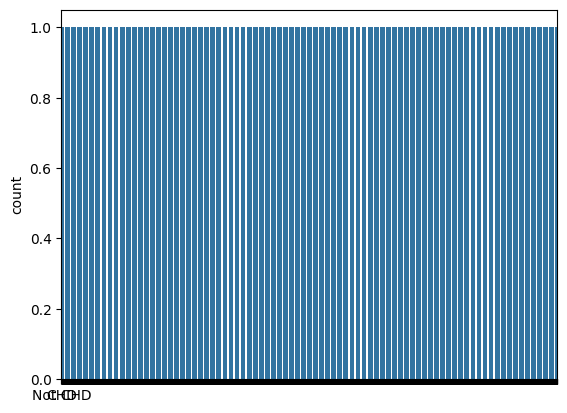

In [287]:
g = sns.countplot(df['TenYearCHD'])
g.set_xticklabels(['Not CHD','CHD'])
plt.show()

In [288]:
# import SMOTE module from library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


<Axes: title={'center': 'count (TenYearCHD)'}, xlabel='TenYearCHD'>

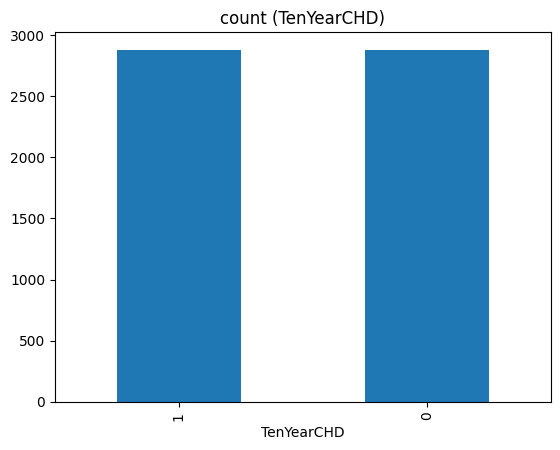

In [289]:
y_smote.value_counts().plot(kind='bar', title='count (TenYearCHD)',)

Que. - What data handling Techniques have you used?

- We have used the SMOTE method to handle the imbalanced data.

## ***6. ML Model Implementation***

**Splitting data into train and test**

In [290]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4030, 14)
Number transactions y_train dataset:  (4030,)
Number transactions X_test dataset:  (1728, 14)
Number transactions y_test dataset:  (1728,)


- **The Train-test ratio is 70:30.**

### ML Model - 1 ( **LogisticRegression** )

In [291]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression

# Fit the Algorithm
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
lr.fit(X_train, y_train)

# Predict on the model
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)
print(f'train_preds {train_preds}')
print(f'test_preds  {test_preds}')

train_preds [0 1 0 ... 0 0 1]
test_preds  [1 0 1 ... 0 1 0]


In [292]:
# Get the accuracy scores
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6724565756823822
The accuracy on test data is  0.6539351851851852


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

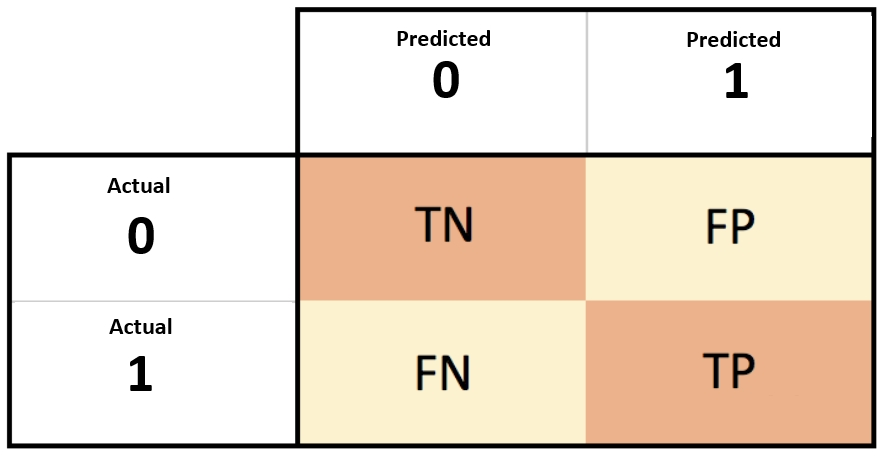

confusion_matrix Score is 
[[1392  661]
 [ 659 1318]]

Axes(0.125,0.11;0.281818x0.77)


<ipython-input-293-cb829b343ba6>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Axes(0.547727,0.11;0.281818x0.77)


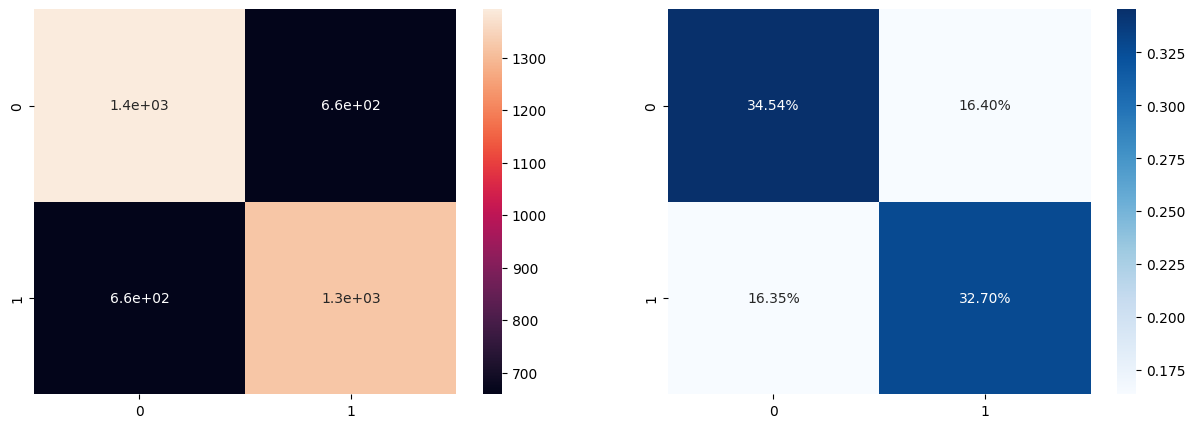

In [293]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_train, train_preds)

print(f'confusion_matrix Score is \n{cf_matrix}\n')

import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
print(sns.heatmap(cf_matrix, annot=True))
plt.subplot(1, 2, 2)
print(sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues'))

#### 2. Cross- Validation & Hyperparameter Tuning

In [294]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# define a dictionary of hyperparameters and their values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# create a GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Best Hyperparameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy:  0.6749379652605458


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

### ML Model - 2 ( **KNeighborsClassifier** )

In [295]:
# ML Model - 3 Implementation
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=2)
# Fit the Algorithm
kn.fit(X_train, y_train)

# Predict on the model
train_preds = kn.predict(X_train)
test_preds = kn.predict(X_test)
print(f'train_preds {train_preds}')
print(f'test_preds  {test_preds}')

train_preds [1 0 0 ... 0 0 0]
test_preds  [0 0 0 ... 1 0 0]


In [296]:
# Get the accuracy scores
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9942928039702233
The accuracy on test data is  0.8859953703703703


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

confusion_matrix Score is 
[[2053    0]
 [  23 1954]]

Axes(0.125,0.11;0.281818x0.77)


<ipython-input-297-b48c1542e2c7>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Axes(0.547727,0.11;0.281818x0.77)


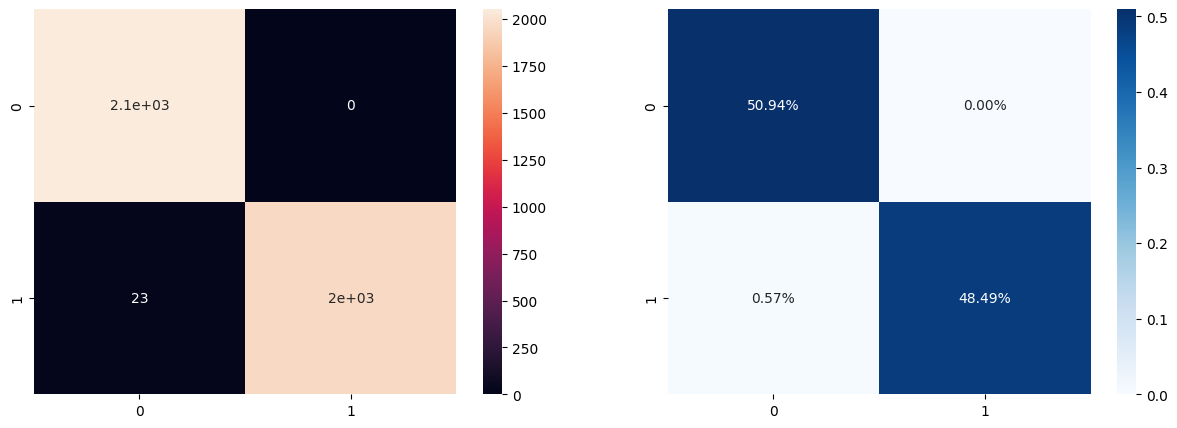

In [297]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_train, train_preds)

print(f'confusion_matrix Score is \n{cf_matrix}\n')

import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
print(sns.heatmap(cf_matrix, annot=True))
plt.subplot(1, 2, 2)
print(sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues'))

#### 2. Cross- Validation & Hyperparameter Tuning

In [298]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV


# define a dictionary of hyperparameters and their values
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
              'metric': ['euclidean', 'manhattan', 'cosine'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

# create a GridSearchCV object
grid_search = GridSearchCV(kn, param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Best Hyperparameters:  {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 1}
Best Accuracy:  0.867741935483871


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 493, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.10/dist-packages/sklea

### ML Model - 3 ( **DecisionTreeClassifier** )

In [299]:
# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=22)

# Fit the Algorithm
decision_tree.fit(X_train, y_train)

# Predict on the model
train_preds = decision_tree.predict(X_train)
test_preds = decision_tree.predict(X_test)
print(f'train_preds {train_preds}')
print(f'test_preds  {test_preds}')

train_preds [1 0 0 ... 0 0 0]
test_preds  [0 1 0 ... 1 1 0]


In [300]:
# Get the accuracy scores
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9987593052109182
The accuracy on test data is  0.7945601851851852


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<ipython-input-301-cb829b343ba6>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


confusion_matrix Score is 
[[2048    5]
 [   0 1977]]

Axes(0.125,0.11;0.281818x0.77)
Axes(0.547727,0.11;0.281818x0.77)


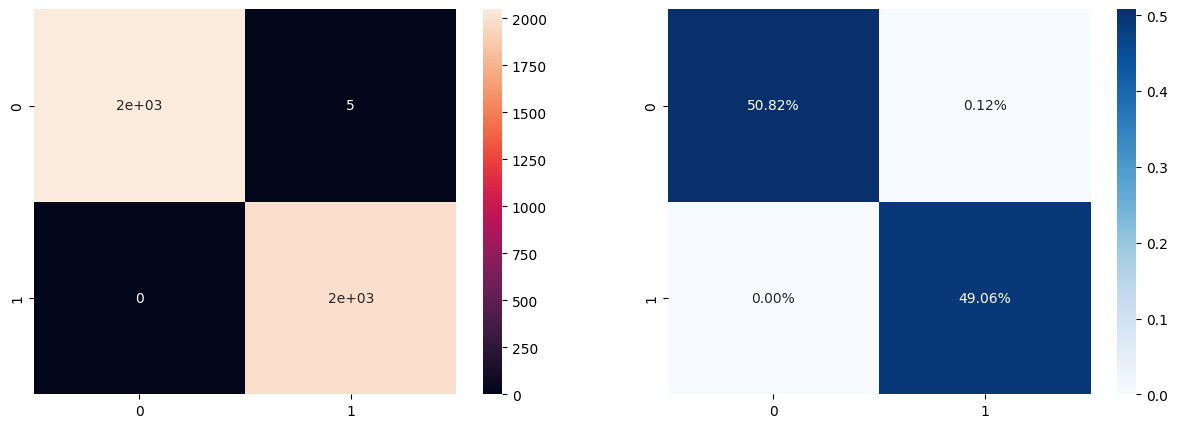

In [301]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_train, train_preds)

print(f'confusion_matrix Score is \n{cf_matrix}\n')

import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
print(sns.heatmap(cf_matrix, annot=True))
plt.subplot(1, 2, 2)
print(sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues'))

#### 2. Cross- Validation & Hyperparameter Tuning

In [302]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# define a dictionary of hyperparameters and their values
param_grid = {'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'criterion': ['gini', 'entropy']}

# Fit the Algorithm
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy:  0.7674937965260547


**Que.->  Which ML model did you choose from the above created models as your final prediction model and why?**




```
- We Consider the K-Neighbour-Classifier as our final Prediction model .
- The accuracy on train data is 0.9915632754342432 .
- The accuracy on test data is 0.8836805555555556 .
- The reason is Testing accuracy.
```



## ***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [304]:
# Save the File
import pickle
pickle.dump(kn,open('/content/model_saved','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [303]:
# Load the File and predict unseen data.
model_loaded = pickle.load(open('/content/model_saved','rb'))

#predict unseen data
model_loaded.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project of Coronary Heart Disease (CHD) analysis, we have worked on several parameters which would help us in predicting the Probability of a persons getting a CHD in next 10years.

In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.

We needs to focus more on :
1.   A Patient smokes or not? if yes, then how many ciggrattes per day.
2.   Weather a patient has any history of HeartStroke & HyperTension.
3.   Weather a Patient takes BP & Diabetes medicines.
4.   A patient's BMI(18.5-25bmi) & HeartRate(60-140) range.

**If we mainly focus on these above point then, we can predict that one will get any CHD disease in next 10 years or more.**

**QUE.->  How Our ML Model can help in detection for the CHD?**
- We used 3 different ML algorithms, LOGISTIC REGRESSION, K_NEAREST_CLASSIFIER, & DECISION TREE from all these ML-model , we found the K_nearest_classifier the most suitable and better, so we implemented it.

- Machine learning (ML) can be very helpful in the prediction of heart attacks in which different risk factors like high blood pressure, high cholesterol, abnormal pulse rate, diabetes, etc... can be considered. The objective of this study is to optimize the prediction of heart disease using ML.




